# **NLP Project: Can we improve cancer patient’s response to available drugs by identifying the important proteins?**

#### Team Members : Behnam Barbadi , Binny Chauhan, Ritu Ranjani Ravi Shankar, Stuti Sanghavi, Tanmayi Varanasi


# 1. Load the tabular Data and perform EDA

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [ ]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('DataFrames/final_pfam_dataframe_no_ID.csv')
df.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034069_k141_12424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034069_k141_46673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NonResponder,ERS2034069_k141_61665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonResponder,ERS2034070_k141_24121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploratory Analysis

#### Let's find the number of pfams in Responder and NonResponders

In [ ]:
from collections import Counter

def counters(df):
    
    responder_pfam_counts = Counter()
    non_responder_pfam_counts = Counter()
    total_pfams_counts =  Counter()
    cols = df.columns[2:]
    
    for index, row in df.iterrows():
        if row.Response == 'Responder':
            for col in cols:
                if df.loc[index, col] == 1:                            
                    responder_pfam_counts[col] += 1
                    total_pfams_counts[col] += 1
        
        else:
            for col in cols:
                if df.loc[index, col] == 1:                            
                    non_responder_pfam_counts[col] += 1
                    total_pfams_counts[col] += 1
                
    return responder_pfam_counts, non_responder_pfam_counts, total_pfams_counts

In [ ]:
pfam_counter = counters(df)

In [ ]:
# Most common pfams in Responders
pfams_in_responders = pfam_counter[0]
print("number of pfams in Responder: ",len(pfams_in_responders))
pfams_in_responders.most_common(20)


number of pfams in Responder:  823


[('PF00109', 50),
 ('PF02801', 49),
 ('PF00550', 45),
 ('PF00501', 37),
 ('PF00106', 34),
 ('PF08659', 33),
 ('PF13561', 33),
 ('PF03176', 32),
 ('PF13450', 31),
 ('PF00005', 27),
 ('PF00891', 26),
 ('PF00535', 25),
 ('PF13279', 24),
 ('PF03061', 23),
 ('PF00072', 23),
 ('PF00593', 23),
 ('PF07715', 23),
 ('PF00890', 23),
 ('PF03548', 22),
 ('PF01553', 22)]

In [ ]:
# Most common pfams in NonResponders
pfams_in_non_responders = pfam_counter[1]
print("number of pfams in NonResponder: ",len(pfams_in_non_responders))
pfams_in_non_responders.most_common(20)

number of pfams in NonResponder:  1318


[('PF00501', 132),
 ('PF00550', 132),
 ('PF00106', 106),
 ('PF13561', 104),
 ('PF08659', 104),
 ('PF04055', 102),
 ('PF00109', 96),
 ('PF02801', 95),
 ('PF13450', 95),
 ('PF13353', 89),
 ('PF00072', 80),
 ('PF13165', 79),
 ('PF00005', 77),
 ('PF00890', 75),
 ('PF03176', 73),
 ('PF07992', 69),
 ('PF00891', 59),
 ('PF03061', 58),
 ('PF01553', 57),
 ('PF00070', 57)]

## UMAP Visualization of Pfam Dataset

In [4]:
data = pd.read_csv("final_pfam_dataframe_no_ID.csv")
data.head() 

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034069_k141_12424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034069_k141_46673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NonResponder,ERS2034069_k141_61665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonResponder,ERS2034070_k141_24121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = data.drop(columns = ['BGC'],axis = 1)

In [6]:
data['Response'] = data['Response'].replace({'NonResponder': 0, 'Responder': 1}).values

In [8]:
protein_data = data.drop(columns = ['Response'],axis = 1)

In [12]:
import umap.umap_ as umap

In [54]:
reducer = umap.UMAP()

In [55]:
scaled_protein_data = StandardScaler().fit_transform(protein_data)

In [72]:
protein_embedding = reducer.fit_transform(scaled_protein_data)
protein_embedding.shape

(444, 2)

Text(0.5, 1.0, 'UMAP projection of the Protein dataset')

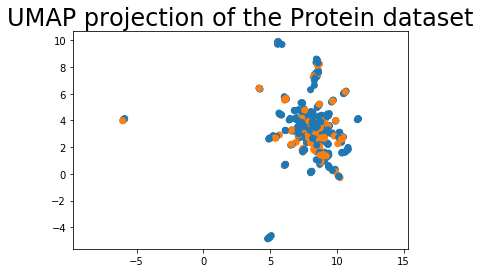

In [77]:
plt.scatter(
    protein_embedding[:, 0],
    protein_embedding[:, 1],
    c=[sns.color_palette()[x] for x in data.Response])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Protein dataset', fontsize=24)

## 2. Using the tabular dataset, Create and train a Linear model to predict the Y label (Reponder / Non Responder) 

In [ ]:
# import resources
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('dark_background')

%matplotlib inline

In [ ]:
df.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034069_k141_12424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034069_k141_46673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NonResponder,ERS2034069_k141_61665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonResponder,ERS2034070_k141_24121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 42, stratify = df.Response, shuffle = True )

In [ ]:
print(f" train shape: {train.shape}\n  test shape: {test.shape}")

 train shape: (310, 1458)
  test shape: (134, 1458)


In [ ]:
train.reset_index(drop=True) 
test.reset_index(drop=True)

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034243_k141_57259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034102_k141_19669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Responder,ERS2034234_k141_216502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Responder,ERS2034203_k141_186898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Responder,ERS2034118_k141_81445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,NonResponder,ERS2034284_k141_76069,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131,NonResponder,ERS2034073_k141_82004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,NonResponder,ERS2034078_k141_7735,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
30,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
370,NonResponder,ERS2034243_k141_57259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,NonResponder,ERS2034102_k141_19669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,Responder,ERS2034234_k141_216502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,Responder,ERS2034203_k141_186898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,Responder,ERS2034118_k141_81445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Save Test  and Train in seperate csv files

In [ ]:
train.to_csv('DataFrames/train_pfam_p3.csv', index=False )
test.to_csv('DataFrames/test_pfam_p3.csv', index=False )

In [ ]:
train_dataset = pd.read_csv('DataFrames/train_pfam_p3.csv')
train_dataset.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_dataset = pd.read_csv('DataFrames/test_pfam_p3.csv')
test_dataset.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034243_k141_57259,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034102_k141_19669,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Responder,ERS2034234_k141_216502,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Responder,ERS2034203_k141_186898,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Responder,ERS2034118_k141_81445,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Let's try a Feed Forward Model in PyTorch

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder

class make_dataset(Dataset):
    def __init__ (self, file_name):
        
        df = pd.read_csv(file_name)
        x = df.iloc[:, 2:].values
        y = df.iloc[:, 0].values

        self.X = torch.tensor(x, dtype = torch.long)
        
        y = LabelEncoder().fit_transform(y)
        self.y = torch.tensor(y, dtype = torch.float32)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):    
        return self.X[idx], self.y[idx]
        

In [ ]:
training_set = make_dataset('DataFrames/train_pfam_p3.csv')
testing_set = make_dataset('DataFrames/test_pfam_p3.csv')

#### Let's test an examples

In [ ]:
train.head()

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
30,NonResponder,ERS2034085_k141_32666,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
420,Responder,ERS2034277_k141_55826,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153,Responder,ERS2034146_k141_37159,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
209,Responder,ERS2034167_k141_9000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,NonResponder,ERS2034159_k141_204702,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_set[4][1], training_set[4][0]

(tensor(0.), tensor([0, 0, 0,  ..., 0, 0, 0]))

#### Creating dataloaders

In [ ]:
len(training_set), len(testing_set)

(310, 134)

In [ ]:
trainloader = torch.utils.data.DataLoader(training_set, batch_size=5, shuffle=True,)
testloader = torch.utils.data.DataLoader(testing_set, batch_size=2, shuffle=True, drop_last=True)

#### Test an example

In [ ]:
data_iter = iter(trainloader)

this_pfam, this_response = next(data_iter)
print(this_pfam.shape, this_response.shape)

torch.Size([5, 1456]) torch.Size([5])


In [ ]:
vocab_dim = this_pfam.shape[1]
vocab_dim

1456

### Linear model

train_loader = torch.utils.data.DataLoader(dataset=training_set, batch_size=5, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=testing_set, batch_size=2, shuffle=True)

vocab_dim

In [ ]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 1456.
        self.layer_1 = nn.Linear(1456, 256) 
        self.layer_2 = nn.Linear(256, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)     
        
    def forward(self, inputs):
        #print("inputs", inputs.shape) = torch.Size([5, 1456])
        
        x = self.relu(self.layer_1(inputs))
        #print("layer_1", x.shape) = torch.Size([5, 256])
        
        x = self.relu(self.layer_2(x))
        #print("layer_2", x.shape) = torch.Size([5, 64])

        x = self.dropout(x)
        #print("dropout", x.shape) = torch.Size([5, 64])
               
        x = torch.sigmoid(self.layer_out(x))
        #print("layer_out", x.shape) = torch.Size([5, 1])
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

binaryClassification(
  (layer_1): Linear(in_features=1456, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


### Note
- Input to the Linear layer must be `(batch_size, num_features)` so we shouldn't use `.T` function 

In [ ]:
def train_linear(model, iterator, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in trainloader:
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
        pfam = pfam.float()
        # torch.transpose(pfam, 0, 1) it works like transpose
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):

    train_loss, train_acc = train_linear(model, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.088 | Train Acc: 95.81% 
| Epoch: 02 | Train Loss: 0.100 | Train Acc: 95.48% 
| Epoch: 03 | Train Loss: 0.079 | Train Acc: 96.13% 
| Epoch: 04 | Train Loss: 0.086 | Train Acc: 96.13% 
| Epoch: 05 | Train Loss: 0.090 | Train Acc: 95.48% 
| Epoch: 06 | Train Loss: 0.091 | Train Acc: 95.48% 
| Epoch: 07 | Train Loss: 0.090 | Train Acc: 95.81% 
| Epoch: 08 | Train Loss: 0.074 | Train Acc: 96.13% 
| Epoch: 09 | Train Loss: 0.076 | Train Acc: 96.45% 
| Epoch: 10 | Train Loss: 0.079 | Train Acc: 96.45% 
| Epoch: 11 | Train Loss: 0.078 | Train Acc: 96.45% 
| Epoch: 12 | Train Loss: 0.080 | Train Acc: 96.77% 
| Epoch: 13 | Train Loss: 0.068 | Train Acc: 96.45% 
| Epoch: 14 | Train Loss: 0.072 | Train Acc: 96.77% 
| Epoch: 15 | Train Loss: 0.059 | Train Acc: 96.77% 
| Epoch: 16 | Train Loss: 0.066 | Train Acc: 96.77% 
| Epoch: 17 | Train Loss: 0.055 | Train Acc: 97.42% 
| Epoch: 18 | Train Loss: 0.070 | Train Acc: 97.10% 
| Epoch: 19 | Train Loss: 0.064 | Train Acc: 9

### Save and Load the model

In [ ]:
torch.save(model.state_dict(), "./models/binaryClassification.pkl")

In [ ]:
model.load_state_dict(torch.load(r"./models/binaryClassification.pkl"))
model.eval()

binaryClassification(
  (layer_1): Linear(in_features=1456, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
def evaluate_linear(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
            pfam = pfam.float() # the model expects tensor of float type 
          
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 15
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train_linear(model, trainloader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate_linear(model, testloader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'models\linear_model_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.061 | Train Acc: 96.45%
	 Loss: 2.475 |  Val. Acc: 72.39%
----------------------------------------------------
Epoch 2: Train Loss: 0.055 | Train Acc: 97.74%
	 Loss: 2.547 |  Val. Acc: 72.39%
----------------------------------------------------
Epoch 3: Train Loss: 0.065 | Train Acc: 96.77%
	 Loss: 2.551 |  Val. Acc: 71.64%
----------------------------------------------------
Epoch 4: Train Loss: 0.056 | Train Acc: 97.10%
	 Loss: 2.668 |  Val. Acc: 72.39%
----------------------------------------------------
Epoch 5: Train Loss: 0.066 | Train Acc: 96.77%
	 Loss: 2.627 |  Val. Acc: 71.64%
----------------------------------------------------
Epoch 6: Train Loss: 0.069 | Train Acc: 96.45%
	 Loss: 2.482 |  Val. Acc: 73.13%
----------------------------------------------------
Epoch 7: Train Loss: 0.057 | Train Acc: 97.74%
	 Loss: 2.705 |  Val. Acc: 73.13%
----------------------------------------------------
Epoch 8: Train Loss: 0.061 | Train Acc: 97.10%
	 Loss: 2.630 |

In [ ]:
def predict(model, iterator, criterion):
    pred = []
    resp = []
    # deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
            pfam = pfam.float() # the model expects tensor of float type 
          
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1).data
            
            resp.append(response)

            rounded_preds = torch.round(predictions)
            pred.append(rounded_preds)
    return torch.cat(pred, 0),torch.cat(resp, 0)

In [ ]:
pred, true = predict(best_model, testloader, criterion)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, recall_score

In [ ]:
from sklearn.metrics import balanced_accuracy_score

In [ ]:
balanced_accuracy_score(pred, true)

0.5317460317460317

In [ ]:
print(classification_report(pred, true))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77        99
         1.0       0.31      0.29      0.30        35

    accuracy                           0.65       134
   macro avg       0.53      0.53      0.53       134
weighted avg       0.64      0.65      0.64       134



#### We are getting an accuracy of 65.0% on the test set using the linear model

## Can we increase the model accuracy by converting the tabular data to text ??



# 3. Creating the Corpus, Train Linear Model using TFIDF vectorizer

In [ ]:
import pandas as pd
import numpy as np
from nltk import word_tokenize

#### Let's load the data

In [ ]:
from sklearn.datasets import load_files

# for reproducibility
random_state = 42

DATA_DIR = "./corpus_new/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=random_state)

In [ ]:
data

{'data': ['PF02518 PF00512 PF13561 PF00106 PF08659 PF00501 PF00109 PF02801 PF00550 PF00890 PF13450 PF01593 PF13279 PF03061 PF13970 PF07977 PF03548 PF01522 PF04383 PF13723 PF08545 PF13489 PF00891 PF03279 PF01370 PF00221 PF09190 PF01406 PF09334 PF01553 PF09835 PF05175 PF13847 PF13649 PF08241 PF08447 PF01590 PF08242',
  'PF07728 PF00004 PF13165 PF13353 PF04055 PF13394 PF03711 PF01276 PF00702 PF13419 PF13412 PF01047 PF12802 PF13242 PF13443 PF00300 PF13463 PF00132 PF01380 PF03977 PF02861 PF12464 PF13580',
  'PF00072 PF00501 PF00550 PF00890 PF13450 PF01370 PF00668 PF02719 PF16363 PF01073 PF07993 PF13460 PF04397 PF14501 PF04321 PF00899 PF07992 PF00070 PF13241 PF01379 PF03900 PF00590 PF02602 PF00490 PF00202 PF02082 PF03444 PF01053 PF01041 PF03460 PF01077 PF12837 PF00037 PF12838 PF13187 PF13237 PF01206 PF00085 PF13098 PF07449 PF02597 PF01398 PF14464 PF13738 PF02910 PF01507 PF00009 PF05154 PF02870 PF01035',
  'PF00005 PF13561 PF00106 PF08659 PF00501 PF00109 PF02801 PF00550 PF13489 PF00891 PF0097

### `data` is a bunch object consists of `'data'` and `'target'`

In [ ]:
import pandas as pd

df_corpus = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
print(f"we have {len(df_corpus)} articles in our dataset")
df_corpus.head(10)

we have 444 articles in our dataset


,text,label
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0
5,PF09950 PF11681 PF11863 PF13262 PF04233 PF1420...,0
6,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,1
7,PF13165 PF13353 PF04055 PF13450 PF00152 PF0133...,0
8,PF03176 PF13561 PF00106 PF08659 PF00501 PF0010...,0
9,PF13165 PF13353 PF04055 PF00890 PF13450 PF0029...,1


In [ ]:
from collections import Counter

# Let's look at the 1st row of data
Counter(df_corpus.iloc[0,0].replace(".", " ").split(" "))

Counter({'PF02518': 1,
         'PF00512': 1,
         'PF13561': 1,
         'PF00106': 1,
         'PF08659': 1,
         'PF00501': 1,
         'PF00109': 1,
         'PF02801': 1,
         'PF00550': 1,
         'PF00890': 1,
         'PF13450': 1,
         'PF01593': 1,
         'PF13279': 1,
         'PF03061': 1,
         'PF13970': 1,
         'PF07977': 1,
         'PF03548': 1,
         'PF01522': 1,
         'PF04383': 1,
         'PF13723': 1,
         'PF08545': 1,
         'PF13489': 1,
         'PF00891': 1,
         'PF03279': 1,
         'PF01370': 1,
         'PF00221': 1,
         'PF09190': 1,
         'PF01406': 1,
         'PF09334': 1,
         'PF01553': 1,
         'PF09835': 1,
         'PF05175': 1,
         'PF13847': 1,
         'PF13649': 1,
         'PF08241': 1,
         'PF08447': 1,
         'PF01590': 1,
         'PF08242': 1})

In [ ]:
pfams  = []
for txt in df_corpus["text"]:
    pfams.extend(txt.split(" "))
    
# Total number of pfams in our dataset
len(pfams)

12487

## Bigrams

In [10]:
bigram = pd.read_csv("df_corpus_pfams.csv")

In [11]:
import nltk
from nltk import bigrams
import networkx as nx
from itertools import chain
from collections import Counter

In [13]:
pd.set_option('display.max_rows', 500)

In [14]:
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [15]:
bigram['bigrams'] = bigram['text'].map(lambda x: find_ngrams(x.split(" "), 2))
bigram.head()

,text,label,bigrams
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0,"[(PF02518, PF00512), (PF00512, PF13561), (PF13..."
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0,"[(PF07728, PF00004), (PF00004, PF13165), (PF13..."
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0,"[(PF00072, PF00501), (PF00501, PF00550), (PF00..."
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1,"[(PF00005, PF13561), (PF13561, PF00106), (PF00..."
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0,"[(PF00440, PF08541), (PF08541, PF01551), (PF01..."


In [16]:
# Bigram Frequency Counts
bigram_list = bigram['bigrams'].tolist()

In [25]:
bigram_list = list(chain(*bigram_list))

In [30]:
bigram_list = [(x.lower(), y.lower()) for x,y in bigram_list]

bigram_counts = Counter(bigram_list)
bigram_counts.most_common(10)

[(('pf00109', 'pf02801'), 144),
 (('pf13561', 'pf00106'), 136),
 (('pf00106', 'pf08659'), 129),
 (('pf02801', 'pf00550'), 122),
 (('pf13353', 'pf04055'), 99),
 (('pf13165', 'pf13353'), 90),
 (('pf00550', 'pf00890'), 80),
 (('pf13279', 'pf03061'), 75),
 (('pf00501', 'pf00109'), 72),
 (('pf00593', 'pf07715'), 70)]

In [45]:
#creating df for the counter
bigram_df = pd.DataFrame(bigram_counts.most_common(10),
                             columns=['bigram', 'count'])

bigram_df

,bigram,count
0,"(pf00109, pf02801)",144
1,"(pf13561, pf00106)",136
2,"(pf00106, pf08659)",129
3,"(pf02801, pf00550)",122
4,"(pf13353, pf04055)",99
5,"(pf13165, pf13353)",90
6,"(pf00550, pf00890)",80
7,"(pf13279, pf03061)",75
8,"(pf00501, pf00109)",72
9,"(pf00593, pf07715)",70


In [46]:
#Visualize Networks of Bigrams
#You can now use this Pandas Dataframe to visualize the top 20 occurring bigrams as networks using the Python package NetworkX.

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')


In [47]:
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

# G.add_node("china", weight=100)

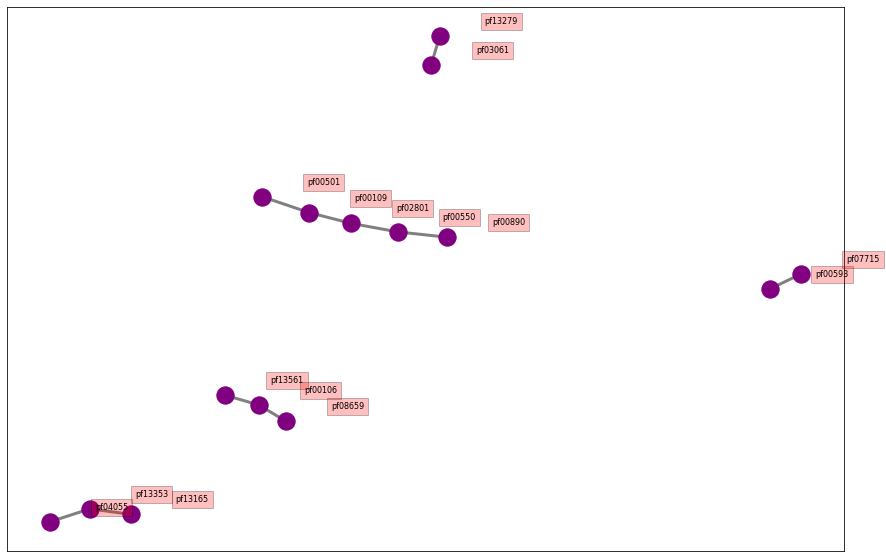

In [48]:
#try to put in a plotly graph
fig, ax = plt.subplots(figsize=(15, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=8)
    
plt.show()

## Save and load the corpus dataframe

In [ ]:
df_corpus.to_csv("DataFrames/df_corpus_pfams.csv", index=False)

In [ ]:
df_corpus = pd.read_csv("DataFrames/df_corpus_pfams.csv")
df_corpus.head()                      

,text,label
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0


In [ ]:
len(df_corpus[ df_corpus.label==1])

106

In [ ]:
len(df_corpus[df_corpus.label==0])

338

### Different rows has different length for `text` column

In [ ]:
df_corpus.iloc[2,:][0]

'PF00072 PF00501 PF00550 PF00890 PF13450 PF01370 PF00668 PF02719 PF16363 PF01073 PF07993 PF13460 PF04397 PF14501 PF04321 PF00899 PF07992 PF00070 PF13241 PF01379 PF03900 PF00590 PF02602 PF00490 PF00202 PF02082 PF03444 PF01053 PF01041 PF03460 PF01077 PF12837 PF00037 PF12838 PF13187 PF13237 PF01206 PF00085 PF13098 PF07449 PF02597 PF01398 PF14464 PF13738 PF02910 PF01507 PF00009 PF05154 PF02870 PF01035'

In [ ]:
len(df_corpus.iloc[1, :][0]), len(df_corpus.iloc[0, :][0])

(183, 303)

#### The number of Responders and NonResponders matches in `df_corpus` and the original `df`

> label 0 &#8594; NonResponder

> Labe 1 &#8594; Responder

### Let's create 2 seperate dataframes for test and train

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_corpus, test_size = 0.3, random_state = 42, stratify = df_corpus.label, shuffle = True)

In [ ]:
# percentage of Responder in test and train data
round(len(train[train.label == 1])/ len(train),2) ,round(len(test[test.label == 1])/len(test), 2)

(0.24, 0.24)

In [ ]:
train.reset_index(drop = True)
test.reset_index(drop=True)

,text,label
0,PF00072 PF00501 PF00550 PF00890 PF01370 PF0066...,0
1,PF00583 PF00717 PF13508 PF13673 PF11799 PF0081...,0
2,PF07728 PF00004 PF00654 PF00005 PF13561 PF0010...,1
3,PF00072 PF00005 PF00501 PF13450 PF13193 PF0277...,1
4,PF00218 PF00291 PF00290 PF02146 PF01649 PF0251...,1
...,...,...
129,PF09950 PF11681 PF11863 PF13262 PF04233 PF1420...,0
130,PF01842 PF00501 PF07690 PF02775 PF00532 PF1337...,0
131,PF02518 PF00512 PF00072 PF00106 PF08659 PF0050...,0
132,PF07728 PF00004 PF00654 PF13561 PF00106 PF0865...,0


In [ ]:
train.to_csv('DataFrames/train_pfam_corpus_p4.csv', index = False)
test.to_csv('DataFrames/test_pfam_corpus_p4.csv', index = False)

In [ ]:
df_train = pd.read_csv('DataFrames/train_pfam_corpus_p4.csv')
df_test = pd.read_csv('DataFrames/test_pfam_corpus_p4.csv')

### Let's use `tf-idf vectorizer`
- Each word in the corpus gets a value based on it's accurance and frequency
- Each article (row) is an array of shape `(1, vocab_size)`

In [ ]:
# articles_train is a 1D numpy  array of all train articels 

articles_train = df_train.text.values
print( type(articles_train), len(articles_train) )

<class 'numpy.ndarray'> 310


In [ ]:
# 1000 characters of the 1st article in the train dataframe
articles_train[0][:1000]

'PF02518 PF00512 PF00072 PF03176 PF04616 PF13561 PF00106 PF08659 PF00109 PF02801 PF00550 PF00890 PF13450 PF01593 PF13279 PF03061 PF13620 PF13715 PF13970 PF07977 PF03548 PF01522 PF04383 PF13723 PF08545 PF13489 PF00891 PF03279 PF01370 PF00221 PF09190 PF01406 PF09334 PF07523 PF07980 PF14322 PF00593 PF07715 PF10566 PF14508 PF12833 PF00165 PF07495 PF07494 PF00535 PF13641 PF01553 PF13704 PF09835 PF05175 PF13847 PF13649 PF08241 PF08242 PF05401 PF13589'

In [ ]:
articles_test = df_test.text.values
len(articles_test)

134

In [ ]:
# Differenet rows has different length
len(articles_train[0]), len(articles_train[1])

(447, 79)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')

### Let's fit `TfidfVectorizer` only on train data and then used this trained vectorizer to transform test data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_pfam = TfidfVectorizer(stop_words='english')
tfidf_vectorizer_pfam = tfidf_vectorizer_pfam.fit(df_train.text.values)
tfidf_vectorizer_pfam

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

### Note
- Because each row is not in the form of One String (article) we need to define our own `make_dataset` class

In [ ]:
import torch
from torch.utils.data import Dataset
from sklearn.preprocessing import StandardScaler, LabelEncoder

class make_dataset(Dataset):
    def __init__ (self, file_name, vectorizer):
        
        if type(file_name) == str:
            df = pd.read_csv(Dataset)
        else:
            df = file_name
            
        x = df.text.values
        y = df.label.values
        
        self.X = vectorizer.transform(x)
            
        self.X = torch.from_numpy(self.X.todense())
        self.X = self.X.long()

        self.y = torch.tensor(y, dtype = torch.float32)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):    
        return self.X[idx], self.y[idx]
        

In [ ]:
training_set = make_dataset(df_train, tfidf_vectorizer_pfam)
len(training_set)


310

In [ ]:
testing_set = make_dataset(df_test, tfidf_vectorizer_pfam)
len(testing_set)

134

In [ ]:
trainloader = torch.utils.data.DataLoader(training_set, batch_size=5, shuffle=True)
testloader = torch.utils.data.DataLoader(testing_set, batch_size = 2, shuffle = True)

In [ ]:
# for testing_set we have batch_size = 2, so in each batch we have 2 examples

data_iter = iter(trainloader)

this_train_article, this_train_label = next(data_iter)
print(this_train_article.shape, this_train_label.shape)
# this_pfam.T, this_response 

torch.Size([5, 1314]) torch.Size([5])


### Note

- We fitted the tf-idf vectorizer only on train data (`articles_train`). Because of this, number of unique words is 1314 as you can see in the 2nd dimension of dataloader

In [ ]:
# for testing_set we have batch_size = 2, so in each batch we have 2 examples

this_test_article, this_test_label = next(iter(testloader))
print(this_test_article.shape, this_test_label.shape)


torch.Size([2, 1314]) torch.Size([2])


### Note
- The output of `torch.utils.data.DataLoader()`has `batch_size` as the 1st elemenet. Alwyas check this because it's important when training the model.

In [ ]:
import torch.nn as nn

class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 1314.
        self.fc1 = nn.Linear(1314, 512) 
        self.fc2 = nn.Linear(512, 256) 
        self.fc3 = nn.Linear(256, 64)
        self.fc_out = nn.Linear(64, 1) 
        self.dropout = nn.Dropout(p=0.1)

        
    def forward(self, inputs):
        #print("inputs", inputs.shape)# = torch.Size([5, 1314])
        
        x = torch.relu(self.fc1(inputs))
        #print("fc1", x.shape)# = torch.Size([5, 256])
        
        x = torch.relu(self.fc2(x))
        #print("fc2", x.shape) #= torch.Size([5, 64])
        
        x = torch.relu(self.fc3(x))
        #print("fc3", x.shape)# 
        
        x = self.dropout(x)
        #print("dropout", x.shape)# = torch.Size([5, 64])
               
        x = torch.sigmoid(self.fc_out(x))
        #print("fc_out", x.shape)# = torch.Size([5, 1])
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
from torch import optim

model = binaryClassification()
model.to(device)
print(model)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

binaryClassification(
  (fc1): Linear(in_features=1314, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=64, bias=True)
  (fc_out): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
)


In [ ]:
def train_linear(model, iterator, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in trainloader:
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
        pfam = pfam.float()
     
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
num_epochs = 20

for epoch in range(num_epochs):

    train_loss, train_acc = train_linear(model, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.588 | Train Acc: 76.13% 
| Epoch: 02 | Train Loss: 0.552 | Train Acc: 76.13% 
| Epoch: 03 | Train Loss: 0.552 | Train Acc: 76.13% 
| Epoch: 04 | Train Loss: 0.562 | Train Acc: 76.13% 
| Epoch: 05 | Train Loss: 0.555 | Train Acc: 76.13% 
| Epoch: 06 | Train Loss: 0.561 | Train Acc: 76.13% 
| Epoch: 07 | Train Loss: 0.553 | Train Acc: 76.13% 
| Epoch: 08 | Train Loss: 0.555 | Train Acc: 76.13% 
| Epoch: 09 | Train Loss: 0.553 | Train Acc: 76.13% 
| Epoch: 10 | Train Loss: 0.559 | Train Acc: 76.13% 
| Epoch: 11 | Train Loss: 0.559 | Train Acc: 76.13% 
| Epoch: 12 | Train Loss: 0.556 | Train Acc: 76.13% 
| Epoch: 13 | Train Loss: 0.555 | Train Acc: 76.13% 
| Epoch: 14 | Train Loss: 0.560 | Train Acc: 76.13% 
| Epoch: 15 | Train Loss: 0.557 | Train Acc: 76.13% 
| Epoch: 16 | Train Loss: 0.554 | Train Acc: 76.13% 
| Epoch: 17 | Train Loss: 0.552 | Train Acc: 76.13% 
| Epoch: 18 | Train Loss: 0.556 | Train Acc: 76.13% 
| Epoch: 19 | Train Loss: 0.560 | Train Acc: 7

In [ ]:
def evaluate_linear(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    # deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.to(device) # batch_size must be the 1st dimension so we don't use .T
            pfam = pfam.float() # the model expects tensor of float type 
          
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 15
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train_linear(model, trainloader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate_linear(model, testloader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'models\linear_model_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.552 | Train Acc: 76.13%
	 Loss: 0.550 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 2: Train Loss: 0.554 | Train Acc: 76.13%
	 Loss: 0.550 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 3: Train Loss: 0.556 | Train Acc: 76.13%
	 Loss: 0.555 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 4: Train Loss: 0.555 | Train Acc: 76.13%
	 Loss: 0.554 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 5: Train Loss: 0.554 | Train Acc: 76.13%
	 Loss: 0.551 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 6: Train Loss: 0.557 | Train Acc: 76.13%
	 Loss: 0.559 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 7: Train Loss: 0.560 | Train Acc: 76.13%
	 Loss: 0.551 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 8: Train Loss: 0.553 | Train Acc: 76.13%
	 Loss: 0.553 |

#### The accuracy on test data set using the text data set(corpus) and TFIDF vectorizer is 76.13%

### Lets try RNN model to see if we can get higer accuracy. But instead of using the built in weight for embedding layer, lets implement Word2Vec (in our case Protien2Vec) to generate embedding weights which will be used in the RNN model

## 4. Implementing Word2Vec to create embedding weights for RNN model

#### Let's create a `corpus` which is a list of lists
- It should have 444 elements which each is a list of words in each article
- Each row is called an artice

In [ ]:
import itertools
import re
import nltk
from nltk import word_tokenize

corpus = []
corpus = [word_tokenize(article) for article in df_corpus.text]

In [ ]:
len(corpus)

444

#### Vocabulary is a list of all unique words in corpus
- We have 1456 unique words in our vocabulary

In [ ]:
vocabulary = set(itertools.chain.from_iterable(corpus))

#### `word_counts` is a dictionary of all words and their frequencies 
- (number of occrance)

In [ ]:
from collections import Counter
word_counts = dict(Counter(list(itertools.chain.from_iterable(corpus))))

len(word_counts)

1456

In [ ]:
# test an example
# print the numbr of occurance of an example
print(f"The frequency (number of occrance) for 'PF13394' is: {word_counts['PF13394']}")

The frequency (number of occrance) for 'PF13394' is: 70


In [ ]:
# show the index of a given word
word_to_index = {w: idx for (idx, w) in enumerate(vocabulary)}

# show the actual word for a given index
index_to_word = {idx: w for (idx, w) in enumerate(vocabulary)}

In [ ]:
word_to_index['PF13394']

104

In [ ]:
index_to_word[1398]

'PF00091'

In [ ]:
class EarlyStopping():
    def __init__(self, patience=5, min_percent_gain=0.1):
        self.patience = patience
        self.loss_list = []
        self.min_percent_gain = min_percent_gain / 100.
        
    def update_loss(self, loss):
        self.loss_list.append(loss)
        if len(self.loss_list) > self.patience:
            del self.loss_list[0]
    
    def stop_training(self):
        if len(self.loss_list) == 1:
            return False
        gain = (max(self.loss_list) - min(self.loss_list)) / max(self.loss_list)
        print("Loss gain: {}%".format(round(100*gain,2)))
#         if gain < self.min_percent_gain:
#             return True
        if min(self.loss_list) < 1:
            return True


In [ ]:
import random

def get_batches(context_tuple_list, batch_size=100):
    
    random.shuffle(context_tuple_list)
    batches = []
    batch_target, batch_context, batch_negative = [], [], []
    
    for i in range(len(context_tuple_list)):
        batch_target.append(word_to_index[context_tuple_list[i][0]])
        batch_context.append(word_to_index[context_tuple_list[i][1]])
        batch_negative.append([word_to_index[w] for w in context_tuple_list[i][2]])
        if (i+1) % batch_size == 0 or i == len(context_tuple_list)-1:
            tensor_target = torch.from_numpy(np.array(batch_target)).long()
            tensor_context = torch.from_numpy(np.array(batch_context)).long()
            tensor_negative = torch.from_numpy(np.array(batch_negative)).long()
            batches.append((tensor_target, tensor_context, tensor_negative))
            batch_target, batch_context, batch_negative = [], [], []
    return batches

#### Creating negative samples

In [ ]:
from numpy.random import multinomial

def sample_negative(sample_size):
    sample_probability = {}
    word_counts = dict(Counter(list(itertools.chain.from_iterable(corpus))))
    normalizing_factor = sum([v**0.75 for v in word_counts.values()])
    for word in word_counts:
        sample_probability[word] = word_counts[word]**0.75 / normalizing_factor
    words = np.array(list(word_counts.keys()))
    while True:
        word_list = []
        sampled_index = np.array(multinomial(sample_size, list(sample_probability.values())))
        for index, count in enumerate(sampled_index):
            for _ in range(count):
                 word_list.append(words[index])
        yield word_list

#### Creating tuples of `(target, context)` and 8 negative samples

In [ ]:
import numpy as np

context_tuple_list = []
w = 4 # window size of 4
negative_samples = sample_negative(8) # cerates 8 random samples for negative sampling

print("Adding to the context_tuple_list:")
for article in corpus:
    for i, word in enumerate(article):
        if i%5000 == 0 :
            print(".", end = ' ')
        
        first_context_word_index = max(0,i-w)
        last_context_word_index = min(i+w, len(article))
        
        for j in range(first_context_word_index, last_context_word_index):
            if i!=j:                
                context_tuple_list.append((word, article[j], next(negative_samples)))
print()                
print("There are {} pairs of target and context words".format(len(context_tuple_list)))


Adding to the context_tuple_list:
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
There are 80277 pairs of target and context words


#### Save and Load a list
- `context_tuple_list` is a list of tuples of target, context and 8 negative samples

In [ ]:
import pickle

with open("context_tuple_list.txt", "wb") as fp:   #Pickling
    pickle.dump(context_tuple_list, fp)

In [ ]:
import pickle

with open("context_tuple_list.txt", "rb") as fp:   # Unpickling
    context_tuple_list = pickle.load(fp)

In [ ]:
context_tuple_list[20]
# the 1st element is the target wird
# the 2nd element is the context word
# the 3rd element is a list of 8 negative samples (incorrect contex words)

('PF08659',
 'PF13561',
 ['PF01553',
  'PF01590',
  'PF03050',
  'PF07853',
  'PF01497',
  'PF07973',
  'PF13102',
  'PF00342'])

In [ ]:
import torch
import torch.nn as nn
import torch.autograd as autograd
import torch.optim as optim
import torch.nn.functional as F


class Word2Vec(nn.Module):

    def __init__(self, embedding_size, vocab_size):
        super(Word2Vec, self).__init__()
        self.embeddings_target = nn.Embedding(vocab_size, embedding_size)
        self.embeddings_context = nn.Embedding(vocab_size, embedding_size)

    def forward(self, target_word, context_word, negative_example):
        emb_target = self.embeddings_target(target_word)
        emb_context = self.embeddings_context(context_word)
        emb_product = torch.mul(emb_target, emb_context) # element-wise multipicatipn(batch_size, emb)
        emb_product = torch.sum(emb_product, dim=1) # sum of all elements in each row (1, batch_dize)
        out = torch.sum(F.logsigmoid(emb_product))
        emb_negative = self.embeddings_context(negative_example)
        
        # torch.bmm: Performs a batch matrix-matrix product of matrices
        # both must be 3-D tensors each containing the same number of matrices.
        emb_product = torch.bmm(emb_negative, emb_target.unsqueeze(2))
        emb_product = torch.sum(emb_product, dim=1)
        out += torch.sum(F.logsigmoid(-emb_product))
        return -out

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### We set the `embedding_size = 200`

In [ ]:
import time

vocabulary_size = len(vocabulary)

net = Word2Vec(embedding_size=200, vocab_size=vocabulary_size).to(device)

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

early_stopping = EarlyStopping(patience=5, min_percent_gain=0.5)

while True:
    losses = []
    context_tuple_batches = get_batches(context_tuple_list, batch_size=2000)
    for i in range(len(context_tuple_batches)):
        net.zero_grad()
        target_tensor, context_tensor, negative_tensor = context_tuple_batches[i]
        
        target_tensor = target_tensor.to(device)
        context_tensor = context_tensor.to(device)
        negative_tensor = negative_tensor.to(device)
        
        loss = net(target_tensor, context_tensor, negative_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print("Loss: ", np.mean(losses))
    early_stopping.update_loss(np.mean(losses))
    if early_stopping.stop_training():
        break

Loss:  41931.555306783535
Loss:  38922.461175685974
Loss gain: 7.18%
Loss:  36247.652212747715
Loss gain: 13.56%
Loss:  33732.8056402439
Loss gain: 19.55%
Loss:  31362.590070026676
Loss gain: 25.21%
Loss:  29108.640351086127
Loss gain: 25.21%
Loss:  26962.2162907298
Loss gain: 25.62%
Loss:  24918.2216796875
Loss gain: 26.13%
Loss:  22985.481421493903
Loss gain: 26.71%
Loss:  21149.76202243712
Loss gain: 27.34%
Loss:  19424.24121689215
Loss gain: 27.96%
Loss:  17807.654058689026
Loss gain: 28.54%
Loss:  16303.132115806022
Loss gain: 29.07%
Loss:  14914.004900676448
Loss gain: 29.48%
Loss:  13638.633723561357
Loss gain: 29.79%
Loss:  12466.93979551734
Loss gain: 29.99%
Loss:  11400.145778749047
Loss gain: 30.07%
Loss:  10429.662943025915
Loss gain: 30.07%
Loss:  9546.11021758289
Loss gain: 30.01%
Loss:  8747.031333365092
Loss gain: 29.84%
Loss:  8023.0760706459605
Loss gain: 29.62%
Loss:  7369.719866496761
Loss gain: 29.34%
Loss:  6777.445068359375
Loss gain: 29.0%
Loss:  6238.3689441215

Loss:  3.0838917522895626
Loss gain: 8.46%
Loss:  3.0177665338283632
Loss gain: 8.43%
Loss:  2.9502418986180934
Loss gain: 8.51%
Loss:  2.8849793461764732
Loss gain: 8.46%
Loss:  2.8237780078155237
Loss gain: 8.43%
Loss:  2.762331462487942
Loss gain: 8.46%
Loss:  2.705681742691412
Loss gain: 8.29%
Loss:  2.645488608901094
Loss gain: 8.3%
Loss:  2.5864784216008534
Loss gain: 8.4%
Loss:  2.5349321866907726
Loss gain: 8.23%
Loss:  2.480389273748165
Loss gain: 8.33%
Loss:  2.4264063246366456
Loss gain: 8.28%
Loss:  2.3743615528432334
Loss gain: 8.2%
Loss:  2.322922897774999
Loss gain: 8.36%
Loss:  2.2760473119049536
Loss gain: 8.24%
Loss:  2.226835138914062
Loss gain: 8.22%
Loss:  2.1793718745068804
Loss gain: 8.21%
Loss:  2.1331667129586385
Loss gain: 8.17%
Loss:  2.0878113602719655
Loss gain: 8.27%
Loss:  2.0446963935363582
Loss gain: 8.18%
Loss:  2.0022352116137014
Loss gain: 8.13%
Loss:  1.9592040093933665
Loss gain: 8.16%
Loss:  1.9171468419272726
Loss gain: 8.17%
Loss:  1.87824648546

#### Save the the calculated weights of the model `state_dict`


In [ ]:
torch.save(net.state_dict(), "linear_model.pkl")

In [ ]:
vocabulary_size = len(vocabulary)

# re-create the model with the same parameters
net_loaded = Word2Vec(embedding_size=200, vocab_size=vocabulary_size)


# load the savded state_dict
net_loaded.load_state_dict(torch.load('linear_model.pkl'))

print(net_loaded)

Word2Vec(
  (embeddings_target): Embedding(1456, 200)
  (embeddings_context): Embedding(1456, 200)
)


In [ ]:
import numpy as np

def get_closest_word(word, topn=5):
    word_distance = []
    emb = net_loaded.embeddings_target.to('cpu') # embeddings_target is a layer's name in net 
    pdist = nn.PairwiseDistance()
    i = word_to_index[word]
    lookup_tensor_i = torch.tensor([i], dtype=torch.long)
    v_i = emb(lookup_tensor_i)
    for j in range(len(vocabulary)):
        if j != i:
            lookup_tensor_j = torch.tensor([j], dtype=torch.long)
            v_j = emb(lookup_tensor_j)
            word_distance.append((index_to_word[j], float(pdist(v_i, v_j))))
    word_distance.sort(key=lambda x: x[1])
    return word_distance[:topn]

In [ ]:
# the 10th word in the 6th element (row) of the corpus
corpus[6][10]

'PF07993'

In [ ]:
# this function gives the embedding of any given tensor
def get_embedding(example):  
    word_idx = word_to_index[example]
    tensor_i = torch.tensor([word_idx], dtype=torch.long)
    emb = net_loaded.embeddings_target.to('cpu')
    v_i = emb(tensor_i)
    print(v_i.shape)
    print(v_i)

In [ ]:
example = corpus[55][0]
example

'PF00501'

In [ ]:
get_embedding('PF00501')

torch.Size([1, 200])
tensor([[-2.2991,  0.5253, -0.9964, -1.6139,  1.2998, -0.3080,  0.2448, -0.0437,
         -0.3418, -0.1017, -0.4683,  0.3968, -0.1404, -0.3298,  2.7316,  1.3592,
         -2.0233,  1.1192,  1.6449, -0.6937, -0.2256,  0.0593,  0.3906, -0.7180,
         -0.4041, -2.1155,  0.6733,  0.3320, -0.3572,  0.6237, -0.5183, -0.1118,
         -0.1271, -0.6497, -1.1516,  0.9270,  0.1475,  0.0390,  0.7907, -1.0855,
         -0.2667, -1.0572,  1.0372,  1.0058, -1.7758,  0.8684, -0.1441, -0.3456,
          0.5087,  0.0118,  1.5673,  0.3258,  0.6706,  0.4766, -1.3515,  0.4094,
          0.9583,  0.3573, -0.3911, -0.7006, -1.5350,  1.2461,  0.9588,  0.3659,
         -0.0107, -0.5987, -0.1805,  0.8826,  1.2060,  0.2502, -1.5413,  0.1253,
          0.5038, -0.5269,  1.0631,  0.7957,  0.1730,  0.2629, -0.6074,  0.0800,
         -0.4441, -0.1265, -0.5839, -1.9574, -0.0213,  1.5949,  0.3490, -0.1473,
          1.3678, -0.8184, -0.9151,  0.6055, -0.6150, -1.2751, -1.0154,  0.7914,
       

In [ ]:
net_loaded.embeddings_target

Embedding(1456, 200)

In [ ]:
index_to_word[1]

'PF00588'

In [ ]:
import torch
import torch.nn as nn

# Get embeddings for the word at index 1 which is 'PF13742'
given_tensor = torch.LongTensor([1]) 

emb = net_loaded.embeddings_target.to('cpu')
emb(given_tensor)

tensor([[ 0.5359, -0.7684,  0.7282, -0.7458,  0.2250,  0.8369, -0.1053,  0.6144,
         -1.5434,  1.3837, -0.0328,  0.8713,  1.0123,  1.0426, -1.1505, -0.0632,
         -0.1059, -0.7121,  0.0374, -0.4777, -0.5480,  1.1887, -0.1980,  2.3879,
         -0.0540, -0.2098, -1.9747,  0.5113,  0.0321,  0.3041, -0.2379, -1.8359,
          0.9093,  0.5847, -2.1586, -1.2363,  0.9626, -1.5322,  0.1414, -1.0482,
         -0.1414, -1.6646,  0.0410,  0.2592,  0.3366, -0.2584,  1.6519, -0.3203,
         -0.8890,  1.0372,  1.7368, -0.4734,  0.5459,  0.5644, -0.5998, -0.8241,
          0.2712,  0.2275, -0.8104,  0.4923, -0.3675, -0.7963, -0.3968,  0.7664,
         -0.1714, -0.2046,  0.8938, -0.4721,  1.4047, -1.3800,  1.3890, -0.0399,
          0.0359,  0.8458,  0.5668, -1.0664,  0.6646,  1.3218,  0.1220, -1.8032,
          0.9963, -1.0555,  1.2964, -0.7797,  0.5181, -0.4212, -0.0137, -1.5138,
          0.6439,  1.1263, -0.2956,  1.1352,  0.6468,  0.1048,  0.5438,  0.3626,
         -0.9292, -0.4250,  

In [ ]:
# m.weight contains the embedding weights.
embed_weights = net_loaded.embeddings_target.weight.detach().numpy()
embed_weights

array([[-1.1012517 , -0.73667127, -0.88576293, ..., -0.28950164,
        -1.2180898 , -1.6013262 ],
       [ 0.5359053 , -0.7683729 ,  0.72822714, ..., -0.77044475,
         0.42743716, -0.08898509],
       [ 0.12467647, -0.25790042,  0.16013083, ..., -0.21123819,
        -2.0667732 , -1.626157  ],
       ...,
       [-0.60910374,  0.6216965 , -0.8842806 , ..., -0.01349114,
         0.7565897 , -0.4376295 ],
       [ 0.02750395, -1.6208653 , -0.01751652, ..., -0.21836942,
        -0.3727686 , -0.03830582],
       [-0.3886597 , -0.9766208 , -0.46216154, ..., -0.43965217,
        -0.79844314,  0.03470441]], dtype=float32)

In [ ]:
# vocab_dim
len(embed_weights)

1456

In [ ]:
# embed_dim
len(embed_weights[0])

200

In [ ]:
print(f"""We have {len(embed_weights)} embeddings which is equal to the total number of rows  
and each embedding has 200 values (a tensor of size (1x 200)) which is equal to the embedding_dim we set before.""")

We have 1456 embeddings which is equal to the total number of rows  
and each embedding has 200 values (a tensor of size (1x 200)) which is equal to the embedding_dim we set before.


#### Save and Load embedding weights

In [ ]:
np.savetxt('embed_weights.txt', embed_weights)

In [ ]:
embed_weights = np.loadtxt('embed_weights.txt')
embed_weights

array([[-1.10125172, -0.73667127, -0.88576293, ..., -0.28950164,
        -1.21808982, -1.60132623],
       [ 0.5359053 , -0.76837289,  0.72822714, ..., -0.77044475,
         0.42743716, -0.08898509],
       [ 0.12467647, -0.25790042,  0.16013083, ..., -0.21123819,
        -2.06677318, -1.62615705],
       ...,
       [-0.60910374,  0.62169647, -0.88428062, ..., -0.01349114,
         0.75658971, -0.43762949],
       [ 0.02750395, -1.62086535, -0.01751652, ..., -0.21836942,
        -0.37276861, -0.03830582],
       [-0.38865969, -0.97662079, -0.46216154, ..., -0.43965217,
        -0.79844314,  0.03470441]])

#### Let's test the embedding weights for a given tensor

In [ ]:
import torch
import torch.nn as nn

vocabulary_size = len(vocabulary) # 1456

# FloatTensor containing pretrained weights
tensor_weight = torch.FloatTensor(embed_weights)
embedding = nn.Embedding(vocabulary_size, 200).from_pretrained(tensor_weight)

# Get embeddings for index 100
given_tensor = torch.LongTensor([100])
embedding(given_tensor)

tensor([[ 1.9294, -0.4915,  1.0318, -0.4365, -0.5282, -1.0763, -1.0245, -0.3804,
         -0.1479, -1.5536,  1.7433, -1.4383, -0.4809,  1.1201,  1.1437,  0.0459,
          0.3696, -2.1861, -0.5929,  1.8557, -1.2914,  1.4966,  0.8013, -0.5334,
         -0.9920, -0.0042,  0.1584,  0.4800, -0.6065, -0.1880, -0.1205, -0.3557,
          0.8604,  0.1648,  1.1942,  0.5635, -0.1705,  0.9610, -1.2785, -0.4699,
          1.1572,  2.0063, -0.3878,  0.6736, -0.4867, -1.7404, -0.5976,  0.0538,
          0.3461,  0.8936, -0.4225, -0.2287, -0.6770, -1.5320,  1.0000,  0.8466,
         -0.8438, -0.1719,  0.8197,  0.7720, -0.6393, -0.7313,  0.0736,  0.9093,
         -1.1983, -0.6063,  0.8366, -0.1000,  0.4303,  0.1646,  0.6053,  0.2938,
          0.7185,  1.8824,  0.7304, -0.1334, -0.5072,  0.1319, -0.4822, -0.5414,
          1.6454,  0.5448, -0.8725,  0.7131, -0.2712,  0.7965,  0.9743,  1.2016,
          0.3105,  1.3030, -0.8468,  0.2280, -0.8793,  1.2977, -0.1493, -0.5487,
         -1.7064, -0.1393, -

#### Now we use these weights in the embedding layer of our model

## 5. Define a RNN model

## Note!
- We are using pretrained embedding wights `embed_weights` in this model
- These weights are calculatd in `VatBiome_5_Word2Vec.ipynb` and saved in `'embed_weights.txt'` file
- These weights are calculated by using an embedding layer of :

> `vocab_dim = 1456`

> `embed_dim = 200`

so when defining the RNN model in the following cells we have to set `embed_dim = 200`

In [ ]:
import torch.nn.functional as F

class RNN(nn.Module):
    
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim, n_layers=1):
        
        super().__init__()
        
        embed_weights = np.loadtxt('embed_weights.txt') # load the pretrained weights
        tensor_weight = torch.FloatTensor(embed_weights) # convert the pretrained weights into tensors
        self.embedding = nn.Embedding(input_dim, embed_dim).from_pretrained(tensor_weight)
        # use pretrained weights in Embedding layer
        
        self.lstm = nn.LSTM(embed_dim, hidden_dim, n_layers)
        
        self.fc = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        #print("x", x.shape)# = (1456, 5)
        
        x = self.embedding(x)
        #print("x", x.shape)# = (1456, 5, 200)
        
        output, (hidden, cell) = self.lstm(x)        
        #print("output", output.shape)# = (1456, 5, 256)
        #print("hidden", hidden.shape)# = (1, 5, 256)
        
        hidden_1D = hidden.squeeze()
        #print("hidden_1D", hidden_1D.shape)# = (5, 256)
            
        assert torch.equal(output[-1], hidden_1D)
        
        # input to the fc layer is (batch_size, num_features)
        x = torch.sigmoid(self.fc(hidden_1D))
        #print("last", x.shape)# = (5, 1)
        
        return x

In [ ]:
input_dim = vocab_dim
embed_dim = 200
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer

vast_rnn = RNN(input_dim, embed_dim, hidden_dim, output_dim, n_layers=1)

In [ ]:
from torch import optim

criterion = nn.BCELoss()
optimizer = optim.Adam(vast_rnn.parameters())

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Note!
> The default setting for `LSTM`  cell is to give `batch_size` as the 2nd dimension to the model, on the other hand because we have used `Dataloader`, each batch of data is in `(batch_size, seq_length)` format so we need to use `.T` function to transpose `pfam` tensor to place the `batch_size` as the 2nd dimension. 

> If we want to input `pfam` as it is which is `(batch_size, seq_length)` we have to use `batch_first = True` when defining `self.lstm` layer

In [ ]:
def train(model, iterator, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in iterator:
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam= pfam.T.to(device) # batch_size must be the 2nd dimension so we use .T
        # torch.transpose(pfam, 0, 1) it works like pfam.T
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
num_epochs = 10


for epoch in range(num_epochs):

    train_loss, train_acc = train(vast_rnn, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.555 | Train Acc: 76.13% 
| Epoch: 02 | Train Loss: 0.554 | Train Acc: 76.13% 
| Epoch: 03 | Train Loss: 0.553 | Train Acc: 76.13% 
| Epoch: 04 | Train Loss: 0.556 | Train Acc: 76.13% 
| Epoch: 05 | Train Loss: 0.553 | Train Acc: 76.13% 
| Epoch: 06 | Train Loss: 0.553 | Train Acc: 76.13% 
| Epoch: 07 | Train Loss: 0.552 | Train Acc: 76.13% 
| Epoch: 08 | Train Loss: 0.557 | Train Acc: 76.13% 
| Epoch: 09 | Train Loss: 0.552 | Train Acc: 76.13% 
| Epoch: 10 | Train Loss: 0.551 | Train Acc: 76.13% 


In [ ]:
# del the model and empty the cache
del vast_rnn
torch.cuda.empty_cache()

### Let's define another model with 2 GRU layers

In [ ]:
class RNN_2_layers(nn.Module):
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim=1, n_layers =2):
        super().__init__()
        
        embed_weights = np.loadtxt('embed_weights.txt') # load the pretrained weights
        tensor_weight = torch.FloatTensor(embed_weights) # convert the pretrained weights into tensors
        self.embedding = nn.Embedding(input_dim, embed_dim).from_pretrained(tensor_weight)
        
        self.gru = nn.GRU(embed_dim, hidden_dim, n_layers)
        
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    
    def forward(self, x):
        # print("x", x.shape) = torch.Size([3166, 5])
        
        x = self.embedding(x)
        # print("x", x.shape) = torch.Size([3166, 5, 100])
            
        output, hidden = self.gru(x)
        # print("output", output.shape)  = torch.Size([3166, 5, 256])
        # print("hidden", hidden.shape) = torch.Size([2, 5, 256])
        
        #hidden = output[-1]
        hidden = torch.cat((hidden[-1, :, :], hidden[-2, :, :]), dim = 1)
        # print("hidden_1D", hidden.shape) = torch.Size([5, 512])
        
        # print(self.fc(hidden).shape) = torch.Size([5, 1])
        x = torch.sigmoid(self.fc(hidden))
        return x
        
        

In [ ]:
input_dim = vocab_dim
embed_dim = 200
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer
n_layers = 2 # 2 layers


vast_gru_2 = RNN_2_layers(input_dim, embed_dim, hidden_dim, output_dim, n_layers=2)

from torch import optim

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(vast_gru_2.parameters())

In [ ]:
def evaluate(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    
    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam= pfam.T.to(device) # batch_size must be the 2nd dimension so we use .T
            pfam = pfam.long()
            # torch.transpose(pfam, 0, 1) it works like transpose
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 15
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train(vast_gru_2, trainloader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate(vast_gru_2, testloader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(vast_gru_2.state_dict(), 'models/vast_gru_2_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.698 | Train Acc: 75.16%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 2: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 3: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 4: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 5: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 6: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 7: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 8: Train Loss: 0.693 | Train Acc: 76.13%
	 Loss: 0.693 |

In [ ]:

del vast_gru_2
torch.cuda.empty_cache()


### A Bidirectioanl RNN with 2 layers

In [ ]:
class RNN_bi_2(nn.Module):
    def __init__ (self, input_dim, embed_dim, hidden_dim, output_dim=1, n_layers = 2, bidirectional=True):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, embed_dim)
        self.gru = nn.GRU(embed_dim, hidden_dim, n_layers, bidirectional = bidirectional)
        self.fc = nn.Linear(hidden_dim*2, output_dim)
    
    def forward(self, x):
        #print("x", x.shape)
        
        x = self.embedding(x)
        #print("x", x.shape)
            
        output, hidden = self.gru(x)
        #print("output", output.shape) 
        #print("hidden", hidden.shape) 
        
        hidden = torch.cat((hidden[-1,: ,:], hidden[-2, :, :]), dim = 1)
        #print("hidden_1D", hidden.shape)
        
        #print(self.fc(hidden).shape)
        x = torch.sigmoid(self.fc(hidden))
        #print('final x', x.shape)
        return x

In [ ]:
input_dim = vocab_dim
embed_dim = 100
hidden_dim = 256
output_dim = 1 # binary classification has only 1 neuron in the last layer


vast_gru_bi_2 = RNN_bi_2(input_dim, embed_dim, hidden_dim, output_dim)

from torch import optim

criterion = nn.BCELoss()
optimizer = optim.Adam(vast_gru_bi_2.parameters())

In [ ]:
vast_gru_bi_2

RNN_bi_2(
  (embedding): Embedding(1456, 100)
  (gru): GRU(100, 256, num_layers=2, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

In [ ]:
num_epochs = 10

for epoch in range(num_epochs):

    train_loss, train_acc = train(vast_gru_bi_2, trainloader, optimizer, criterion)
    
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% ')

| Epoch: 01 | Train Loss: 0.577 | Train Acc: 76.13% 
| Epoch: 02 | Train Loss: 0.564 | Train Acc: 76.13% 
| Epoch: 03 | Train Loss: 0.554 | Train Acc: 76.13% 
| Epoch: 04 | Train Loss: 0.555 | Train Acc: 76.13% 
| Epoch: 05 | Train Loss: 0.577 | Train Acc: 76.13% 
| Epoch: 06 | Train Loss: 0.572 | Train Acc: 76.13% 
| Epoch: 07 | Train Loss: 0.566 | Train Acc: 76.13% 
| Epoch: 08 | Train Loss: 0.560 | Train Acc: 76.13% 
| Epoch: 09 | Train Loss: 0.557 | Train Acc: 76.13% 
| Epoch: 10 | Train Loss: 0.552 | Train Acc: 76.13% 


# 6. CNN Model 

### Preprocessing the data
- Using Texthero


In [ ]:
df_corpus = pd.read_csv('DataFrames/df_corpus_pfams.csv')
df_corpus

,text,label
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0
...,...,...
439,PF00218 PF00291 PF00290 PF02146 PF01649 PF0251...,0
440,PF01842 PF00501 PF07690 PF02775 PF00532 PF1337...,0
441,PF09950 PF11863 PF13262 PF09979 PF04233 PF1420...,1
442,PF02518 PF00512 PF00072 PF03176 PF00005 PF1356...,1


In [ ]:
import texthero as hero

In [ ]:
df_corpus['tokens'] = hero.tokenize(df_corpus.text)

In [ ]:
type(df_corpus['tokens'] [0])

list

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_corpus, stratify = df_corpus.label, test_size = 0.3, random_state = 42, shuffle = True)

In [ ]:
# set new indices for both dataframes and drop the previus indices
train = train.reset_index(drop=True)
test = test.reset_index(drop = True)
len(train), len(test)

(310, 134)

In [ ]:
df_corpus.to_pickle("DataFrames/df_corpus_cnn.pkl")
train.to_pickle("DataFrames/df_corpus_train_cnn.pkl")
test.to_pickle("DataFrames/df_corpus_test_cnn.pkl")

In [ ]:
# top_data_df_small = pd.read_csv('top_data_df_small')
top_data_df_small = pd.read_pickle("./DataFrames/df_corpus_cnn.pkl")
top_data_df_small.head()

,text,label,tokens
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0,"[PF02518, PF00512, PF13561, PF00106, PF08659, ..."
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0,"[PF07728, PF00004, PF13165, PF13353, PF04055, ..."
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0,"[PF00072, PF00501, PF00550, PF00890, PF13450, ..."
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1,"[PF00005, PF13561, PF00106, PF08659, PF00501, ..."
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0,"[PF00440, PF08541, PF01551, PF01613, PF03050, ..."


In [ ]:
train = pd.read_pickle("DataFrames/df_corpus_train_cnn.pkl")
test = pd.read_pickle("DataFrames/df_corpus_test_cnn.pkl")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torch
# Use cuda if present
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device available for running: ")
print(device)

Device available for running: 
cuda


In [ ]:
%%capture
!pip install sent2vec
import nltk
nltk.download('punkt')
from scipy import spatial
from sent2vec.vectorizer import Vectorizer
from sent2vec.splitter import Splitter
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Behnam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# list of list (list of all reveiews where each review is convetred into tokens) + 'pad' token as a seperate review
words_list = [x for x in top_data_df_small['tokens']]
words_list.append(['pad'])
words_list

[['PF02518',
  'PF00512',
  'PF13561',
  'PF00106',
  'PF08659',
  'PF00501',
  'PF00109',
  'PF02801',
  'PF00550',
  'PF00890',
  'PF13450',
  'PF01593',
  'PF13279',
  'PF03061',
  'PF13970',
  'PF07977',
  'PF03548',
  'PF01522',
  'PF04383',
  'PF13723',
  'PF08545',
  'PF13489',
  'PF00891',
  'PF03279',
  'PF01370',
  'PF00221',
  'PF09190',
  'PF01406',
  'PF09334',
  'PF01553',
  'PF09835',
  'PF05175',
  'PF13847',
  'PF13649',
  'PF08241',
  'PF08447',
  'PF01590',
  'PF08242'],
 ['PF07728',
  'PF00004',
  'PF13165',
  'PF13353',
  'PF04055',
  'PF13394',
  'PF03711',
  'PF01276',
  'PF00702',
  'PF13419',
  'PF13412',
  'PF01047',
  'PF12802',
  'PF13242',
  'PF13443',
  'PF00300',
  'PF13463',
  'PF00132',
  'PF01380',
  'PF03977',
  'PF02861',
  'PF12464',
  'PF13580'],
 ['PF00072',
  'PF00501',
  'PF00550',
  'PF00890',
  'PF13450',
  'PF01370',
  'PF00668',
  'PF02719',
  'PF16363',
  'PF01073',
  'PF07993',
  'PF13460',
  'PF04397',
  'PF14501',
  'PF04321',
  'PF00899

In [ ]:
from gensim.models import Word2Vec
size = 500
window = 8
min_count = 1
workers = 3
sg = 1 # 1 for SkipGram otherwise, CBOW

w2v_model = Word2Vec(words_list, min_count = 1, size = 500, workers = 3, window = 8, sg = 1)
word2vec_file =  'models/' + 'word2vec_' + str(size) + '_PAD.model'
w2v_model.save(word2vec_file)

In [ ]:
# total number fo words in w2vmodel
len(w2v_model.wv.vocab)

1457

In [ ]:
w2v_model.wv['PF13620'][:50]

array([-0.1838335 , -0.38329825, -0.06509006, -0.09015577, -0.03379937,
       -0.04062326, -0.01600329, -0.17865947,  0.13573319, -0.05753909,
        0.2105    , -0.13185927, -0.02634927,  0.18223156, -0.20949747,
       -0.348439  ,  0.05224674,  0.10612968, -0.18449973, -0.07711662,
       -0.04065878, -0.09321044,  0.10531508,  0.01256751,  0.20770627,
       -0.06327493, -0.19284791,  0.1956762 , -0.01449251, -0.106268  ,
        0.07176778,  0.03327806, -0.04696866,  0.09102228, -0.11435727,
       -0.12787464,  0.05184639,  0.14449716, -0.23164867,  0.07955749,
       -0.25377256,  0.03470199, -0.09451951,  0.06335738,  0.17854714,
        0.2722164 ,  0.00068994,  0.14832383,  0.03055051, -0.05790399],
      dtype=float32)

In [ ]:
w2v_model.wv.most_similar('PF13620',topn=5)

[('PF03061', 0.9994257688522339),
 ('PF07977', 0.9987894296646118),
 ('PF13279', 0.998498260974884),
 ('PF13970', 0.9983115196228027),
 ('PF13715', 0.9978629350662231)]

In [ ]:
# the next line apply len() to each rows of top_data_df_small.stemmed_tokens and find the max of these values
max_sen_len = top_data_df_small.tokens.map(len).max() # 774 
padding_idx = w2v_model.wv.vocab['pad'].index # index of the pad token is 1053

def make_word2vec_vector_cnn(sentence):
    padded_X = [padding_idx for i in range(max_sen_len)] # first create a list of all pad tokens
    i = 0
    for word in sentence:
        if word not in w2v_model.wv.vocab:
            padded_X[i] = 0
            #print(word)
        else:
            padded_X[i] = w2v_model.wv.vocab[word].index
        i += 1
    return torch.tensor(padded_X, dtype=torch.long, device=device).view(1, -1)

In [ ]:
print(max_sen_len, padding_idx)

121 1456


In [ ]:
from torch.utils.data import Dataset

class make_dataset(Dataset):
    def __init__(self, dataframe):
        if type(dataframe) == str: # when input is the name of a csv file
            df = pd.read_csv(dataframe)
        else: # when a dataframe is directly given
            df = dataframe
            
         
        self.X = df['tokens'].apply(make_word2vec_vector_cnn)
        #print(X.shape)
        
        y = df['label'] # returns 0, 1 as label 
        self.y = torch.tensor(y, dtype = torch.float32) # these are 0 or 1 floats
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):    
        return self.X[idx], self.y[idx]

In [ ]:
train_data = make_dataset(train)
test_data = make_dataset(test)

In [ ]:
len(train_data), len(test_data)

(310, 134)

In [ ]:
train_data[17][0]

tensor([[  11,    5,    4,    6,    1,    0,   16,   21,   24,  455,   60,  456,
          117,   23,   39,  457,  211,  173,   59,  458,  366,  367,   17,   31,
          102,   51,  146,  333,  334,  629,  981,  459,  231,  258,  526,  527,
          528,  368,  529,  631,  369,  632,  460,  530, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456, 1456,
         1456]], device='cuda:0')

In [ ]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size = 5, drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = 2, drop_last=True )

In [ ]:
data_iter = iter(train_loader)

predictors, target = next(data_iter)
print(predictors.squeeze(1).shape, target.shape) # each train batch has 32 elements in it

torch.Size([5, 121]) torch.Size([5])


In [ ]:
data_iter = iter(train_loader)

predictors, target = next(data_iter)
print(predictors.squeeze(1).shape, target) # each train batch has 2 elements in it

torch.Size([5, 121]) tensor([0., 1., 1., 1., 0.])


In [ ]:
EMBEDDING_SIZE = 500
NUM_FILTERS = 10
import gensim

class CnnTextClassifier(nn.Module):
    def __init__(self, vocab_size, num_classes, window_sizes=(1,2,3,5)):
        super(CnnTextClassifier, self).__init__()
        w2v_model = gensim.models.KeyedVectors.load('models/' + 'word2vec_500_PAD.model') # load the saved model
        weights = w2v_model.wv # get the KeydVectors (keyvectors have keys as index of each word)
        
        # With pretrained embeddings
        tensor_weights = torch.FloatTensor(weights.vectors)
        self.embedding = nn.Embedding.from_pretrained(tensor_weights, padding_idx=w2v_model.wv.vocab['pad'].index)

        # for each window size, 1 conv layer
        self.convs = nn.ModuleList([ 
                               nn.Conv2d(1, NUM_FILTERS, [window_size, EMBEDDING_SIZE], padding=(window_size - 1, 0))
                               for window_size in window_sizes
        ])

        self.fc = nn.Linear(NUM_FILTERS * len(window_sizes), 1)

    def forward(self, x):
        #print("model: ",x.shape) = [32, 774]
        # x represents one row of dataframe. It is a vector of 888 elements where each element is an index of a word 
        x = self.embedding(x) # [Batch, Sequence_length, Embedding] = [32, 774, 500])
        #print("x after embedding: ", x.shape)
        # Apply a convolution + max_pool layer for each window size
        x = torch.unsqueeze(x, 1) #  [32, 1, 774, 500]) like a grayscale image
        xs = []
        for conv in self.convs: # we have 4 conv layers with different winodow sizes
            x2 = torch.tanh(conv(x))
            #print("x2 after conv: ", x2.shape) # [32, 10, 774, 1]>>[32, 10, 775, 1]>>[32, 10, 776, 1]>>[32, 10, 778, 1]
            x2 = torch.squeeze(x2, -1)
            #print("x2 after squeeze: ", x2.shape)# [32, 10, 774] >> [32, 10, 775] >> [32, 10, 776] >> [32, 10, 778]
            x2 = F.max_pool1d(x2, x2.size(2)) # keyps only the highets value of each feature vector (detected features for that window size)
            #print("x2 after maxpool: ", x2.shape) # [32, 10, 1]
            xs.append(x2) # combines all these matricies to from one final matrix of all detected features
            #print("xs: ", len(xs)) # 4, a list of 4 matricies eaxch is [32, 10, 1]
        x = torch.cat(xs, 2) # concatanate all matricies in xs on the last dimension(1) to form the final feature matrix
        #print("x before flatten: ", x.shape) # [32, 10, 4])
        # FC, x.size(0) is the batch_size
        x = x.view(x.size(0), -1) # flatten the feature matrix into a vector
        #print("x after flatten: ", x.shape) # [32, 40]
        x = torch.sigmoid(self.fc(x))
        
        return x


In [ ]:
### criterion = nn.NLLLoss()
VOCAB_SIZE = len(w2v_model.wv.vocab)

cnn_model = CnnTextClassifier(vocab_size=VOCAB_SIZE, num_classes=1)
cnn_model.to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

In [ ]:
def train(model, iterator, optimizer, criterion):

    model.to(device)

    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for pfam, response in iterator:
        
        optimizer.zero_grad()
        
        # pfam = pfam.long()
        pfam = pfam.squeeze(1).to(device) # batch_size must be the 2nd dimension so we use .T
        # torch.transpose(pfam, 0, 1) it works like pfam.T
        response = response.to(device)
        
        # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
        predictions = model(pfam).squeeze(1)
                
        loss = criterion(predictions, response)
        
        rounded_preds = torch.round(predictions)
        correct = (rounded_preds == response).float()
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion):
    
    #initialize every epoch
    epoch_loss = 0
    epoch_acc = 0

    
    #deactivating dropout layers
    model.eval()
    
    #deactivates autograd
    with torch.no_grad():
    
        for pfam, response in iterator:
        
            pfam = pfam.squeeze(1).to(device) # batch_size must be the 2nd dimension so we use .T
            pfam = pfam.long()
            # torch.transpose(pfam, 0, 1) it works like transpose
            response = response.to(device)

            # output of the model is: (batch_size, 1) and we get rid of 1 with sueeze(dim=1)
            predictions = model(pfam).squeeze(1)

            loss = criterion(predictions, response)

            rounded_preds = torch.round(predictions)
            correct = (rounded_preds == response).float()

            acc = correct.sum() / len(correct)

            #keep track of loss and accuracy
            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
N_EPOCHS = 10
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
     
    #train the model
    train_loss, train_acc = train(cnn_model, train_loader, optimizer, criterion)
    
    #evaluate the model
    valid_loss, valid_acc = evaluate(cnn_model, test_loader, criterion)
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(cnn_model.state_dict(), 'models/cnn_model_saved_weights.pt')
    
    print(f'Epoch {epoch+1}: Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')
    print('----------------------------------------------------')

Epoch 1: Train Loss: 0.553 | Train Acc: 76.13%
	 Loss: 0.548 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 2: Train Loss: 0.551 | Train Acc: 76.13%
	 Loss: 0.547 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 3: Train Loss: 0.550 | Train Acc: 76.13%
	 Loss: 0.546 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 4: Train Loss: 0.550 | Train Acc: 76.13%
	 Loss: 0.545 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 5: Train Loss: 0.548 | Train Acc: 76.13%
	 Loss: 0.543 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 6: Train Loss: 0.547 | Train Acc: 76.13%
	 Loss: 0.543 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 7: Train Loss: 0.546 | Train Acc: 76.13%
	 Loss: 0.542 |  Val. Acc: 76.12%
----------------------------------------------------
Epoch 8: Train Loss: 0.546 | Train Acc: 76.13%
	 Loss: 0.541 |

# 7. Autogluon

In [2]:
from autogluon import TabularPrediction as task
from sklearn.model_selection import train_test_split

In [10]:
import texthero as hero

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [3]:
%pylab inline
import pandas as pd
from typing import Callable, Iterable
import numpy as np
import scipy.special
import itertools

Populating the interactive namespace from numpy and matplotlib


In [4]:
df_corpus = pd.read_csv("df_corpus_pfams.csv")
df_corpus.head()

,text,label
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0


In [11]:
import texthero as hero
df['cleanText'] = hero.clean(df['text'])
df.head()

,text,label,cleanText
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0,pf02518 pf00512 pf13561 pf00106 pf08659 pf0050...
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0,pf07728 pf00004 pf13165 pf13353 pf04055 pf1339...
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0,pf00072 pf00501 pf00550 pf00890 pf13450 pf0137...
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1,pf00005 pf13561 pf00106 pf08659 pf00501 pf0010...
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0,pf00440 pf08541 pf01551 pf01613 pf03050 pf0162...


In [13]:
#TRAIN THE MODEL

df = df.drop(['text'], axis=1)

train_data, test_data = train_test_split(df, test_size=0.2, random_state=123)
print("Train size =",train_data.shape," | Test size =",test_data.shape)

###
# Adding count vectorizer to make this process a bit easier
###

from sklearn.feature_extraction.text import CountVectorizer

# Set vocab size
vectorizer = CountVectorizer(max_features=500).fit(train_data['cleanText'])
vocab = vectorizer.get_feature_names()

train_countvec_text = pd.DataFrame(vectorizer.transform(train_data['cleanText']).toarray(), columns=vocab, index=train_data.index)
test_countvec_text = pd.DataFrame(vectorizer.transform(test_data['cleanText']).toarray(), columns=vocab, index=test_data.index)

train_data = pd.concat([train_data.drop(['cleanText'], axis=1), train_countvec_text], axis=1)
test_data = pd.concat([test_data.drop(['cleanText'], axis=1), test_countvec_text], axis=1)

Train size = (355, 2)  | Test size = (89, 2)


In [59]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
%%time
predictor = task.fit(train_data=train_data, label='label')
performance = predictor.evaluate(test_data)

No output_directory specified. Models will be saved in: AutogluonModels/ag-20201205_082237/
Beginning AutoGluon training ...
AutoGluon will save models to AutogluonModels/ag-20201205_082237/
AutoGluon Version:  0.0.14
Train Data Rows:    355
Train Data Columns: 500
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    7223.91 MB
	Train Data (Original)  Memory Usage: 1.42 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special 

Predictive performance on given dataset: accuracy = 0.8202247191011236
CPU times: user 10.3 s, sys: 567 ms, total: 10.8 s
Wall time: 9.84 s


In [16]:
y_test = test_data['label']
test_data_nolabel = test_data.drop(labels=['label'],axis=1)
y_pred = predictor.predict(test_data_nolabel)
perf = predictor.evaluate_predictions(y_true=y_test, y_pred=y_pred, auxiliary_metrics=True)
print(perf)

Evaluation: accuracy on test data: 0.8202247191011236
Evaluations on test data:
{
    "accuracy": 0.8202247191011236,
    "accuracy_score": 0.8202247191011236,
    "balanced_accuracy_score": 0.6172932330827068,
    "matthews_corrcoef": 0.35708600317685946,
    "f1_score": 0.8202247191011236
}
Detailed (per-class) classification report:
{
    "0": {
        "precision": 0.8292682926829268,
        "recall": 0.9714285714285714,
        "f1-score": 0.8947368421052632,
        "support": 70
    },
    "1": {
        "precision": 0.7142857142857143,
        "recall": 0.2631578947368421,
        "f1-score": 0.3846153846153846,
        "support": 19
    },
    "accuracy": 0.8202247191011236,
    "macro avg": {
        "precision": 0.7717770034843205,
        "recall": 0.6172932330827068,
        "f1-score": 0.6396761133603239,
        "support": 89
    },
    "weighted avg": {
        "precision": 0.8047214501037466,
        "recall": 0.8202247191011236,
        "f1-score": 0.7858345084838284

OrderedDict([('accuracy', 0.8202247191011236), ('accuracy_score', 0.8202247191011236), ('balanced_accuracy_score', 0.6172932330827068), ('matthews_corrcoef', 0.35708600317685946), ('f1_score', 0.8202247191011236), ('confusion_matrix',     0  1
0  68  2
1  14  5), ('classification_report', {'0': {'precision': 0.8292682926829268, 'recall': 0.9714285714285714, 'f1-score': 0.8947368421052632, 'support': 70}, '1': {'precision': 0.7142857142857143, 'recall': 0.2631578947368421, 'f1-score': 0.3846153846153846, 'support': 19}, 'accuracy': 0.8202247191011236, 'macro avg': {'precision': 0.7717770034843205, 'recall': 0.6172932330827068, 'f1-score': 0.6396761133603239, 'support': 89}, 'weighted avg': {'precision': 0.8047214501037466, 'recall': 0.8202247191011236, 'f1-score': 0.7858345084838284, 'support': 89}})])


Since we see from the output of autogluon that Lightgbm has better accuracy and timing in the training and validation, using lightgbm to run treeSHAP classifier. 

In [18]:
import shap
# Lightgbm model

In [51]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import shap

# print the JS visualization code to the notebook
shap.initjs()

In [61]:
train_data_wo_label = train_data.drop(['label'], axis=1)
test_data_wo_label = test_data.drop(['label'], axis=1)

In [62]:
# lgb model

d_train = lgb.Dataset(train_data_wo_label, label=train_data['label'])
d_test = lgb.Dataset(test_data_wo_label, label=test_data['label'])

In [63]:
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

model = lgb.train(params, d_train, 10000, valid_sets=[d_test], early_stopping_rounds=50, verbose_eval=1000)

Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[49]	valid_0's binary_logloss: 0.505337


In [64]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test_data.drop(['label'],axis=1))

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


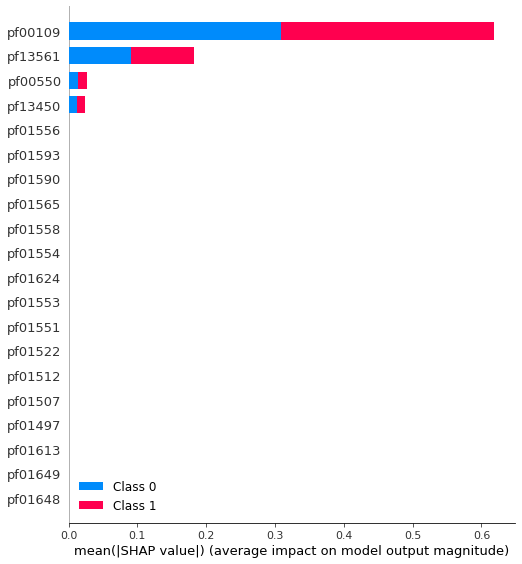

In [66]:
shap.summary_plot(shap_values, test_data.drop(['label'],axis=1))

In [67]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_data.drop(['label'],axis=1))

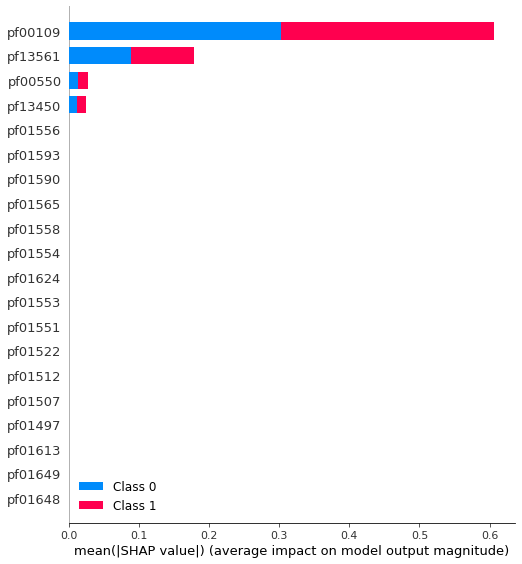

In [68]:
shap.summary_plot(shap_values, train_data.drop(['label'],axis=1))

# 8. Feature Importance

### Using SHAP values

In [ ]:
import gc
import glob
import os
import random
import time
from datetime import date, datetime

import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn import model_selection
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
import xgboost

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [ ]:
data = pd.read_csv("final_pfam_dataframe_no_ID.csv")
data.head() 

,Response,BGC,PF00218,PF00291,PF00290,PF02146,PF01649,PF02518,PF00512,PF00486,...,PF15902,PF09822,PF03739,PF13690,PF04509,PF10639,PF04439,PF12412,PF16347,PF02995
0,NonResponder,ERS2034069_k141_12424,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NonResponder,ERS2034069_k141_46673,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NonResponder,ERS2034069_k141_61665,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NonResponder,ERS2034070_k141_24121,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NonResponder,ERS2034071_k141_39888,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = data.drop(columns = ['BGC'],axis = 1)

In [ ]:
data['Response'] = data['Response'].replace({'NonResponder': 0, 'Responder': 1}).values

In [ ]:
len(data[ data.Response==0])

338

In [ ]:
X = data.drop(columns = ['Response'],axis = 1)
y = data['Response'].values

In [ ]:
shap.initjs()

In [ ]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

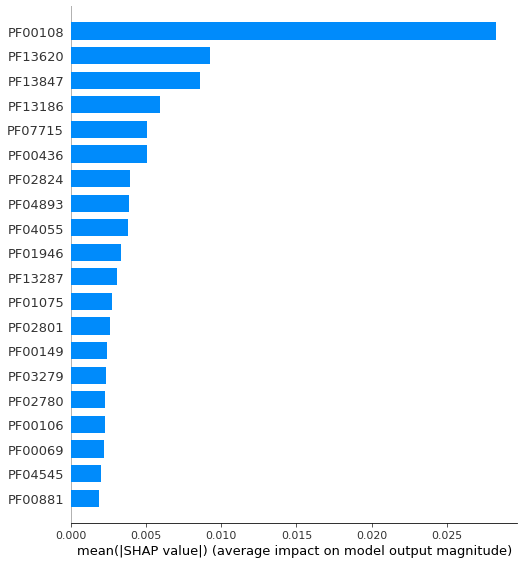

In [14]:
# Plot summary_plot
shap.summary_plot(shap_values, features=X, plot_type='bar')

### Using CAPTUM

In [ ]:
from captum.attr import IntegratedGradients
from captum.attr import LayerConductance
from captum.attr import NeuronConductance
from scipy import stats

In [ ]:
model = binaryClassification()
model.load_state_dict(torch.load(r"./models/binaryClassification.pkl"))
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.to(device)
model.eval()

binaryClassification(
  (layer_1): Linear(in_features=1456, out_features=256, bias=True)
  (layer_2): Linear(in_features=256, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)

In [ ]:
training_set = make_dataset('DataFrames/train_pfam_p3.csv')
testing_set = make_dataset('DataFrames/test_pfam_p3.csv')

In [ ]:
ig = IntegratedGradients(model)
#torch.tensor(testing_set, dtype = torch.float32)
testing_set = testing_set[:][0].type(torch.float32) 
test_input_tensor = testing_set
#testing_set[:][0]
test_input_tensor.requires_grad_()
attr = ig.attribute(test_input_tensor.to(device), target = 0 , n_steps=350)
attr = attr.detach().cpu().numpy()
feature_names = list(test_dataset.columns[2:])
feature_names

['PF00218',
 'PF00291',
 'PF00290',
 'PF02146',
 'PF01649',
 'PF02518',
 'PF00512',
 'PF00486',
 'PF00072',
 'PF05681',
 'PF00254',
 'PF05698',
 'PF00574',
 'PF06689',
 'PF05496',
 'PF07724',
 'PF07728',
 'PF00004',
 'PF10431',
 'PF05362',
 'PF13541',
 'PF01926',
 'PF02421',
 'PF00381',
 'PF00160',
 'PF08543',
 'PF00294',
 'PF03547',
 'PF13165',
 'PF13353',
 'PF04055',
 'PF07549',
 'PF03176',
 'PF02355',
 'PF01368',
 'PF02272',
 'PF09084',
 'PF00654',
 'PF01928',
 'PF00216',
 'PF16326',
 'PF00005',
 'PF04616',
 'PF13561',
 'PF00106',
 'PF01842',
 'PF00754',
 'PF08659',
 'PF00501',
 'PF14535',
 'PF00109',
 'PF02801',
 'PF00550',
 'PF00890',
 'PF01266',
 'PF13450',
 'PF01593',
 'PF13279',
 'PF03061',
 'PF03706',
 'PF13620',
 'PF13715',
 'PF01066',
 'PF02502',
 'PF02779',
 'PF00456',
 'PF02782',
 'PF00370',
 'PF11762',
 'PF00596',
 'PF00293',
 'PF13970',
 'PF07977',
 'PF08011',
 'PF09820',
 'PF03548',
 'PF01522',
 'PF04383',
 'PF13723',
 'PF08545',
 'PF13489',
 'PF00891',
 'PF03279',
 'PF

In [ ]:
attr[:20]

array([[ 0., -0.,  0., ...,  0., -0.,  0.],
       [ 0., -0.,  0., ...,  0., -0.,  0.],
       [ 0., -0.,  0., ...,  0., -0.,  0.],
       ...,
       [ 0., -0.,  0., ...,  0., -0.,  0.],
       [ 0., -0.,  0., ...,  0., -0.,  0.],
       [ 0., -0.,  0., ...,  0., -0.,  0.]])

In [ ]:
attr.shape

(134, 1456)

In [ ]:
captum_importance = pd.DataFrame(list(zip(captum_feature_names, np.mean(attr, axis=0))), columns=['col_name','captum_vals'])
captum_importance.sort_values(by=['captum_vals'], ascending=False,inplace=True)
captum_importance.reset_index(drop=True, inplace = True)
captum_importance

,col_name,captum_vals
0,PF02801,0.052957
1,PF03176,0.050438
2,PF00535,0.042687
3,PF07715,0.029167
4,PF00891,0.027598
...,...,...
1451,PF01522,-0.023736
1452,PF13561,-0.025651
1453,PF13186,-0.026119
1454,PF00890,-0.026788


In [ ]:
captum_importance.to_csv(".\DataFrames\captum_importance.csv")

In [ ]:
captum_feature_names = list(test_dataset.columns[2:])
captum_feature_names

['PF00218',
 'PF00291',
 'PF00290',
 'PF02146',
 'PF01649',
 'PF02518',
 'PF00512',
 'PF00486',
 'PF00072',
 'PF05681',
 'PF00254',
 'PF05698',
 'PF00574',
 'PF06689',
 'PF05496',
 'PF07724',
 'PF07728',
 'PF00004',
 'PF10431',
 'PF05362',
 'PF13541',
 'PF01926',
 'PF02421',
 'PF00381',
 'PF00160',
 'PF08543',
 'PF00294',
 'PF03547',
 'PF13165',
 'PF13353',
 'PF04055',
 'PF07549',
 'PF03176',
 'PF02355',
 'PF01368',
 'PF02272',
 'PF09084',
 'PF00654',
 'PF01928',
 'PF00216',
 'PF16326',
 'PF00005',
 'PF04616',
 'PF13561',
 'PF00106',
 'PF01842',
 'PF00754',
 'PF08659',
 'PF00501',
 'PF14535',
 'PF00109',
 'PF02801',
 'PF00550',
 'PF00890',
 'PF01266',
 'PF13450',
 'PF01593',
 'PF13279',
 'PF03061',
 'PF03706',
 'PF13620',
 'PF13715',
 'PF01066',
 'PF02502',
 'PF02779',
 'PF00456',
 'PF02782',
 'PF00370',
 'PF11762',
 'PF00596',
 'PF00293',
 'PF13970',
 'PF07977',
 'PF08011',
 'PF09820',
 'PF03548',
 'PF01522',
 'PF04383',
 'PF13723',
 'PF08545',
 'PF13489',
 'PF00891',
 'PF03279',
 'PF

Average Feature Importances
PF00218 :  0.000
PF00291 :  -0.001
PF00290 :  0.000
PF02146 :  0.000
PF01649 :  0.000
PF02518 :  -0.012
PF00512 :  -0.000
PF00486 :  0.000
PF00072 :  0.011
PF05681 :  0.000
PF00254 :  0.001
PF05698 :  0.001
PF00574 :  0.000
PF06689 :  0.000
PF05496 :  0.004
PF07724 :  0.000
PF07728 :  -0.000
PF00004 :  0.004
PF10431 :  0.000
PF05362 :  -0.000
PF13541 :  -0.000
PF01926 :  -0.000
PF02421 :  -0.000
PF00381 :  0.000
PF00160 :  0.000
PF08543 :  -0.001
PF00294 :  -0.002
PF03547 :  -0.000
PF13165 :  -0.017
PF13353 :  -0.012
PF04055 :  0.000
PF07549 :  -0.004
PF03176 :  0.050
PF02355 :  -0.003
PF01368 :  -0.010
PF02272 :  -0.005
PF09084 :  -0.000
PF00654 :  -0.007
PF01928 :  -0.000
PF00216 :  -0.001
PF16326 :  -0.001
PF00005 :  0.023
PF04616 :  -0.007
PF13561 :  -0.026
PF00106 :  -0.024
PF01842 :  -0.022
PF00754 :  -0.006
PF08659 :  -0.012
PF00501 :  -0.002
PF14535 :  -0.000
PF00109 :  0.023
PF02801 :  0.053
PF00550 :  0.010
PF00890 :  -0.027
PF01266 :  -0.006
PF134

PF10035 :  -0.000
PF05860 :  -0.000
PF05594 :  0.000
PF08479 :  -0.000
PF17287 :  -0.000
PF03865 :  -0.000
PF02826 :  -0.000
PF01661 :  0.000
PF13091 :  -0.000
PF08032 :  0.000
PF13432 :  0.000
PF04733 :  0.000
PF14559 :  0.000
PF01042 :  0.000
PF13638 :  0.000
PF02562 :  0.000
PF13604 :  -0.000
PF09848 :  0.000
PF13727 :  0.000
PF07228 :  -0.000
PF00400 :  0.000
PF01471 :  -0.001
PF13744 :  0.005
PF05973 :  -0.000
PF02436 :  -0.000
PF00364 :  -0.000
PF10704 :  0.000
PF13477 :  0.000
PF13579 :  -0.000
PF02583 :  -0.000
PF00830 :  0.000
PF17293 :  0.000
PF13102 :  0.000
PF01637 :  -0.000
PF13173 :  0.000
PF01609 :  0.001
PF05598 :  -0.000
PF11756 :  -0.000
PF13506 :  0.000
PF04240 :  0.000
PF06827 :  0.000
PF06831 :  0.000
PF02769 :  0.000
PF00920 :  0.000
PF01026 :  -0.002
PF04909 :  0.002
PF13728 :  -0.000
PF00657 :  0.000
PF13930 :  0.000
PF03796 :  0.000
PF12762 :  0.000
PF00401 :  0.000
PF02823 :  0.000
PF02894 :  0.000
PF02746 :  0.000
PF04204 :  0.000
PF04072 :  -0.003
PF14765 : 

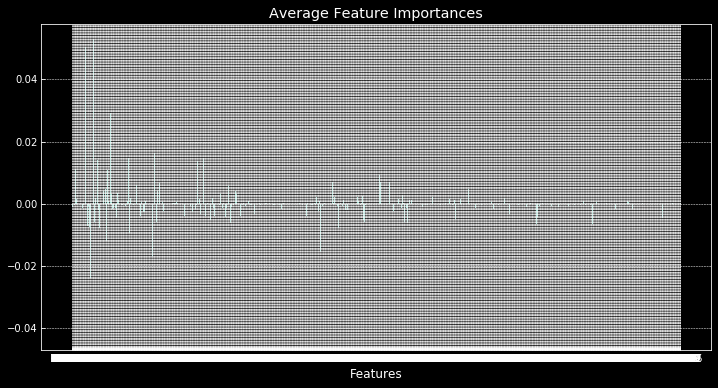

In [ ]:
# Helper method to print importances and visualize distribution
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('dark_background')

def visualize_importances(feature_names, importances, title="Average Feature Importances", plot=True, axis_title="Features"):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", '%.3f'%(importances[i]))
    x_pos = (np.arange(len(feature_names)))
    if plot:
        plt.figure(figsize=(12,6))
        plt.bar(x_pos, importances, align='center')
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)
visualize_importances(captum_feature_names, np.mean(attr, axis=0))

In [ ]:
f = []
v = []
d = {}
for i in range(len(captum_feature_names)):
    if abs(np.mean(attr, axis=0)[i]) > 0.020:
        #print(feature_names[i], ": ", '%.3f'%(np.mean(attr, axis=0)[i]))
        f.append(feature_names[i])
        v.append(np.mean(attr, axis=0)[i])
        d[feature_names[i]] = np.mean(attr, axis=0)[i]
        

In [ ]:
len(d)

15

In [ ]:
sorted_d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1])}
sorted_d

{'PF08242': -0.04231691486600289,
 'PF00890': -0.026787654444367995,
 'PF13186': -0.026118814379059906,
 'PF13561': -0.0256507933803902,
 'PF01522': -0.023736360242603272,
 'PF00106': -0.02369375243740479,
 'PF01842': -0.022303470048216596,
 'PF00593': 0.021737714925327976,
 'PF00005': 0.022650711503018,
 'PF00109': 0.022764026128541472,
 'PF00891': 0.027597986079424177,
 'PF07715': 0.029167274246753708,
 'PF00535': 0.04268730564776679,
 'PF03176': 0.05043757875313058,
 'PF02801': 0.052957111979374055}

In [ ]:
feautures_df = pd.DataFrame.from_dict(sorted_d,columns = ['importance'], orient='index').reset_index()
feautures_df.rename(columns = {'index': 'pfams'}, inplace = True)
feautures_df.to_csv('./DataFrames/df_15_captum_features.csv')

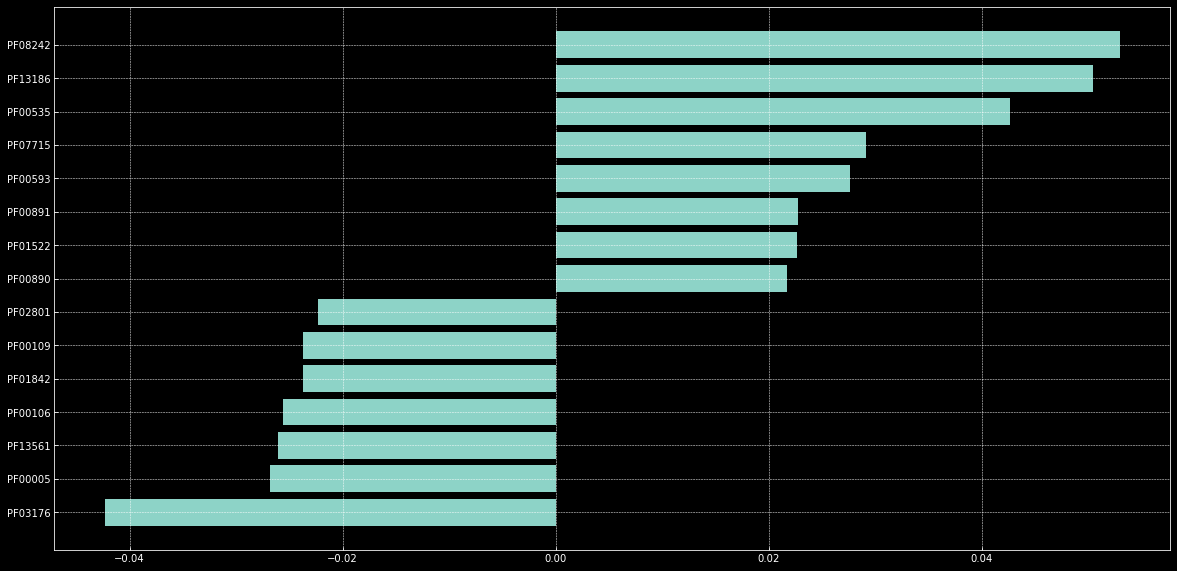

In [ ]:

plt.figure(figsize=(20,10))
#plt.xticks([], d.keys(), rotation='vertical', color = 'gold')
#plt.xticks(x, labels, rotation='vertical')
#plt.bar(d.keys(), d.values(), width = 0.8, color='r')
plt.barh(list(d.keys()), sorted(list(d.values())), align='center')
plt.show()

### Using Topic Modeling

In [ ]:
import pandas as pd
import numpy as np
from nltk import word_tokenize

In [ ]:
df_corpus = pd.read_csv("DataFrames/df_corpus_pfams.csv")
df_corpus

,text,label
0,PF02518 PF00512 PF13561 PF00106 PF08659 PF0050...,0
1,PF07728 PF00004 PF13165 PF13353 PF04055 PF1339...,0
2,PF00072 PF00501 PF00550 PF00890 PF13450 PF0137...,0
3,PF00005 PF13561 PF00106 PF08659 PF00501 PF0010...,1
4,PF00440 PF08541 PF01551 PF01613 PF03050 PF0162...,0
...,...,...
439,PF00218 PF00291 PF00290 PF02146 PF01649 PF0251...,0
440,PF01842 PF00501 PF07690 PF02775 PF00532 PF1337...,0
441,PF09950 PF11863 PF13262 PF09979 PF04233 PF1420...,1
442,PF02518 PF00512 PF00072 PF03176 PF00005 PF1356...,1


In [ ]:
doc_clean = []
for row in range(len(df_corpus)):
    tokens = word_tokenize(df_corpus.text[row])
    doc_clean.append(tokens)
                 
print(f"In dic_clean we have{len(doc_clean)} documnets.")
print(f"The 1st document is: \n{doc_clean[0]}")

In dic_clean we have444 documnets.
The 1st document is: 
['PF02518', 'PF00512', 'PF13561', 'PF00106', 'PF08659', 'PF00501', 'PF00109', 'PF02801', 'PF00550', 'PF00890', 'PF13450', 'PF01593', 'PF13279', 'PF03061', 'PF13970', 'PF07977', 'PF03548', 'PF01522', 'PF04383', 'PF13723', 'PF08545', 'PF13489', 'PF00891', 'PF03279', 'PF01370', 'PF00221', 'PF09190', 'PF01406', 'PF09334', 'PF01553', 'PF09835', 'PF05175', 'PF13847', 'PF13649', 'PF08241', 'PF08447', 'PF01590', 'PF08242']


In [ ]:
# Importing Gensim
import gensim
from gensim import corpora

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(doc_clean)

In [ ]:
import itertools

# The 1st 20 items in the dictionary
dict(itertools.islice(dictionary.items(), 20))

{0: 'PF00106',
 1: 'PF00109',
 2: 'PF00221',
 3: 'PF00501',
 4: 'PF00512',
 5: 'PF00550',
 6: 'PF00890',
 7: 'PF00891',
 8: 'PF01370',
 9: 'PF01406',
 10: 'PF01522',
 11: 'PF01553',
 12: 'PF01590',
 13: 'PF01593',
 14: 'PF02518',
 15: 'PF02801',
 16: 'PF03061',
 17: 'PF03279',
 18: 'PF03548',
 19: 'PF04383'}

In [ ]:
# Converting the corpus (list of documents) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
print(f"""the words in the 1st document are: 

{doc_clean[10]}


let's see the doc_term_matrix represantation of the 1st docuument:
{doc_term_matrix[10]}""")

the words in the 1st document are: 

['PF00702', 'PF13419', 'PF00156', 'PF13242', 'PF13229', 'PF14572', 'PF13793', 'PF04519', 'PF00977', 'PF02594', 'PF01025', 'PF00226', 'PF01556', 'PF00684', 'PF04452', 'PF02152', 'PF00494', 'PF00717', 'PF02913', 'PF01565', 'PF11984', 'PF09721', 'PF01386', 'PF14693', 'PF00475']


let's see the doc_term_matrix represantation of the 1st docuument:
[(41, 1), (53, 1), (57, 1), (188, 1), (226, 1), (227, 1), (228, 1), (229, 1), (230, 1), (231, 1), (232, 1), (233, 1), (234, 1), (235, 1), (236, 1), (237, 1), (238, 1), (239, 1), (240, 1), (241, 1), (242, 1), (243, 1), (244, 1), (245, 1), (246, 1)]


In [ ]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
# we persume that we have 2 topics (Responder and NonResponder)
# passes is the numebr of iterations
ldamodel = Lda(doc_term_matrix, num_topics=2, id2word = dictionary, passes=50)

In [ ]:
lda_output = ldamodel.print_topics(num_topics=3, num_words=20)
lda_output

In [ ]:
lda_output[0][1]

'0.021*"PF00550" + 0.019*"PF00109" + 0.019*"PF02801" + 0.018*"PF00106" + 0.018*"PF08659" + 0.018*"PF13561" + 0.013*"PF00501" + 0.011*"PF00891" + 0.011*"PF00890" + 0.011*"PF03061" + 0.011*"PF13450" + 0.011*"PF01553" + 0.010*"PF13279" + 0.010*"PF00593" + 0.010*"PF03279" + 0.010*"PF07715" + 0.010*"PF03176" + 0.009*"PF13723" + 0.009*"PF00535" + 0.009*"PF00221"'

In [ ]:
topic_0_features = [x[7:14] for x in lda_output[0][1].split() if len(x) > 1]
topic_1_features = [x[7:14] for x in lda_output[1][1].split() if len(x) > 1]

In [ ]:
topic_0_values = [x[:5] for x in lda_output[0][1].split() if len(x) > 1]
topic_1_values= [x[:5] for x in lda_output[1][1].split() if len(x) > 1]

In [ ]:
topic_0 = [0]*20
topic_1 = [1]*20

In [ ]:
topic_0

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
l1 = topic_0 + topic_1
l2 = topic_0_features + topic_1_features
l3 = topic_0_values + topic_0_values

In [ ]:
print(l1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
df_topic_modeling_20 = pd.DataFrame(list(zip(l1, l2, l3)),
              columns=['Topic','feature', 'value'])

df_topic_modeling_20

,Topic,feature,value
0,0,PF00550,0.021
1,0,PF00109,0.019
2,0,PF02801,0.019
3,0,PF00106,0.018
4,0,PF08659,0.018
5,0,PF13561,0.018
6,0,PF00501,0.013
7,0,PF00891,0.011
8,0,PF00890,0.011
9,0,PF03061,0.011


In [ ]:
df_topic_modeling_20.to_csv('.\DataFrames\df_topic_modeling_20.csv')

In [ ]:
topic_counter = []
for i in range(len(doc_term_matrix)):
    max_p = 0
    index_for_max_p = 0
    length = len(ldamodel[doc_term_matrix[i]])
   
    for j in range(length):
        if ldamodel[doc_term_matrix[i]][j][1] > max_p:
            max_p = ldamodel[doc_term_matrix[i]][j][1]
            index_for_max_p = ldamodel[doc_term_matrix[i]][j][0]
            
    topic_counter.append(index_for_max_p)
    print(f"Documnet {i} | Assigned Topic: {index_for_max_p} | max probability: {max_p:0.2f}")


Documnet 0 | Assigned Topic: 0 | max probability: 0.99
Documnet 1 | Assigned Topic: 1 | max probability: 0.98
Documnet 2 | Assigned Topic: 0 | max probability: 0.99
Documnet 3 | Assigned Topic: 0 | max probability: 0.99
Documnet 4 | Assigned Topic: 1 | max probability: 0.96
Documnet 5 | Assigned Topic: 0 | max probability: 0.95
Documnet 6 | Assigned Topic: 0 | max probability: 0.99
Documnet 7 | Assigned Topic: 1 | max probability: 0.98
Documnet 8 | Assigned Topic: 0 | max probability: 0.99
Documnet 9 | Assigned Topic: 1 | max probability: 0.92
Documnet 10 | Assigned Topic: 1 | max probability: 0.98
Documnet 11 | Assigned Topic: 1 | max probability: 0.72
Documnet 12 | Assigned Topic: 0 | max probability: 0.98
Documnet 13 | Assigned Topic: 0 | max probability: 0.98
Documnet 14 | Assigned Topic: 0 | max probability: 0.99
Documnet 15 | Assigned Topic: 0 | max probability: 0.97
Documnet 16 | Assigned Topic: 0 | max probability: 0.89
Documnet 17 | Assigned Topic: 0 | max probability: 0.96
Do

Documnet 173 | Assigned Topic: 1 | max probability: 0.96
Documnet 174 | Assigned Topic: 0 | max probability: 0.99
Documnet 175 | Assigned Topic: 1 | max probability: 0.98
Documnet 176 | Assigned Topic: 0 | max probability: 0.98
Documnet 177 | Assigned Topic: 1 | max probability: 0.99
Documnet 178 | Assigned Topic: 0 | max probability: 0.99
Documnet 179 | Assigned Topic: 0 | max probability: 0.98
Documnet 180 | Assigned Topic: 1 | max probability: 0.98
Documnet 181 | Assigned Topic: 1 | max probability: 0.88
Documnet 182 | Assigned Topic: 1 | max probability: 0.98
Documnet 183 | Assigned Topic: 0 | max probability: 0.97
Documnet 184 | Assigned Topic: 0 | max probability: 0.98
Documnet 185 | Assigned Topic: 1 | max probability: 0.94
Documnet 186 | Assigned Topic: 0 | max probability: 0.99
Documnet 187 | Assigned Topic: 0 | max probability: 0.97
Documnet 188 | Assigned Topic: 1 | max probability: 0.99
Documnet 189 | Assigned Topic: 1 | max probability: 0.97
Documnet 190 | Assigned Topic: 

Documnet 337 | Assigned Topic: 0 | max probability: 0.99
Documnet 338 | Assigned Topic: 1 | max probability: 0.98
Documnet 339 | Assigned Topic: 1 | max probability: 0.96
Documnet 340 | Assigned Topic: 0 | max probability: 0.99
Documnet 341 | Assigned Topic: 0 | max probability: 0.99
Documnet 342 | Assigned Topic: 0 | max probability: 0.99
Documnet 343 | Assigned Topic: 0 | max probability: 0.64
Documnet 344 | Assigned Topic: 1 | max probability: 0.97
Documnet 345 | Assigned Topic: 0 | max probability: 0.98
Documnet 346 | Assigned Topic: 1 | max probability: 0.87
Documnet 347 | Assigned Topic: 0 | max probability: 0.99
Documnet 348 | Assigned Topic: 0 | max probability: 0.98
Documnet 349 | Assigned Topic: 1 | max probability: 0.85
Documnet 350 | Assigned Topic: 1 | max probability: 0.98
Documnet 351 | Assigned Topic: 0 | max probability: 0.98
Documnet 352 | Assigned Topic: 0 | max probability: 0.97
Documnet 353 | Assigned Topic: 1 | max probability: 0.73
Documnet 354 | Assigned Topic: 

In [ ]:
print(f" The total number of documnets in topic 1 is {topic_counter.count(1)} and in topic 0 is {topic_counter.count(0)}.")

 The total number of documnets in topic 1 is 244 and in topic 0 is 200.


In [ ]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.style.use('bmh')
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.178974  0.0       1        1  54.924989
1     -0.178974  0.0       2        1  45.075011, topic_info=        Term        Freq       Total Category  logprob  loglift
1    PF00109  133.000000  133.000000  Default  30.0000  30.0000
15   PF02801  131.000000  131.000000  Default  29.0000  29.0000
54   PF13353   95.000000   95.000000  Default  28.0000  28.0000
26   PF08659  124.000000  124.000000  Default  27.0000  27.0000
52   PF13165   85.000000   85.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
3    PF00501   61.172372  152.444124   Topic2  -4.5216  -0.1163
64   PF00072   41.392957   93.160089   Topic2  -4.9122  -0.0144
62   PF00037   34.758003   59.813774   Topic2  -5.0869   0.2540
31   PF13450   41.916878  113.978909   Topic2  -4.8996  -0.2035
204  PF03176   30.110583   95.253629   Topic2  -5.2304  -0.3548

[119 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
38        1  0.040397  PF00004
38        2  0.969524  PF00004
106       1  0.331453  PF00005
106       2  0.673599  PF00005
62        1  0.417964  PF00037
...     ...       ...      ...
102       1  0.247523  PF13738
102       2  0.765072  PF13738
36        1  0.999150  PF13847
213       1  0.981688  PF14322
200       2  0.974182  PF14691

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])

## 9. Common Proteins Identified

18 common proteins were identified from the three models - SHAP, Topic Modeling and Captum

    PF00005
    PF00072
    PF00106
    PF00109
    PF00501
    PF00593
    PF00702
    PF00890
    PF02801
    PF03061
    PF03176
    PF03279
    PF04055
    PF07715
    PF13186
    PF13353
    PF13450
    PF13561

### References

https://github.com/slundberg/shap

https://github.com/ethen8181/machine-learning/blob/master/keras/text_classification/transformers/gensim_word2vec.py

https://christophm.github.io/interpretable-ml-book/shap.html

https://arxiv.org/abs/1408.5882

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0141287

https://towardsdatascience.com/text-classification-with-cnns-in-pytorch-1113df31e79f

https://captum.ai/tutorials/Titanic_Basic_Interpret
